In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from graph.belief_network import *
from siren_vae_explorations_utils import *
from data.load_data import *

In [3]:
device = "cpu" if not(torch.cuda.is_available()) else "cuda:0"
print(device)

cuda:0


# SIReN-VAE: Investigations

### VAE Models

**VAE 1** (_vanilla_) All latents are assumed to be independent in the generative model. Likewise, all latents are conditionally independent given the observation in the inference model. No flows are used. 

**VAE 2** (_fc_) Latents are fully connected and all observed variables depend on all latents in the generative model. The inference network encodes a faithful inverse of this BN. GRFs are used to encode these structures.

**VAE 3** (_graphical_) The generative network does not encode all of the _fc_-VAE's dependencies such that its encoded structure corresponds to the true conditional independencies assumed to be true for the data. The inference network encodes the faithful inverse of this BN. GRFs are used to encode these structures.

**VAE 4** (_random_) Encodes a random BN structure using GRFs in both the generative and inference models. The random BN has the same number of edges as the hypothesized BN of VAE 3.

### Bayesian Networks

|         BN                      | #Latent | #Observed | #Edges |
| ------------------------------- | ------- | --------- | ------ |
| Arithmetic-Circuit 2            | 5       | 10        | 17     |
| EColi70 Alternative (Synthetic) | 15      | 29        | 59     |
| Arth150 (Synthetic)             | 40      | 67        | 150    |
| Mehra (Real)                    | 3       | 7         | 10     |

In [4]:
# Sparsity
bns = [ArithmeticCircuit2(), EColi70Adapted(), Arth150(), 
        Mehra()]
print_sparsity(bns)

+----------------------+----------+
| Belief Network       | SPARSITY |
+======================+==========+
| ArithmeticCircuit2   | 28.333%  |
+----------------------+----------+
| EColi70Adapted       | 10.926%  |
+----------------------+----------+
| Arth150              | 4.335%   |
+----------------------+----------+
| Mehra                | 41.667%  |
+----------------------+----------+


---

<div class="alert alert-block alert-info">

## Investigation 1: Performance on Structured Data

</div>

#### Arithmetic-Circuit 2

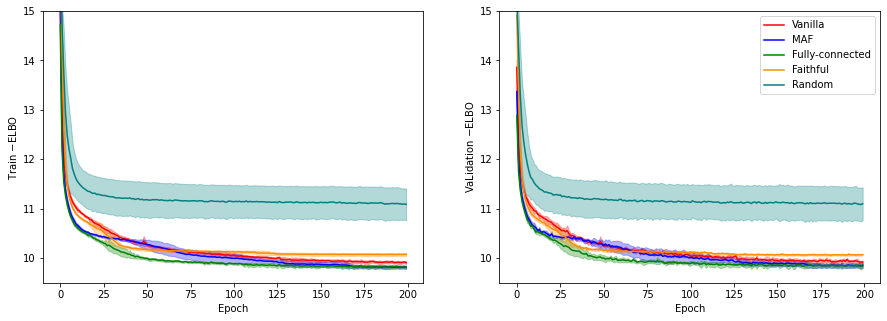

In [5]:
# Plot loss
experiments = [
    'vanilla_vae/arithmetic-circuit2/[100]_[100]',
    'maf_vae/arithmetic-circuit2/3_[100]_[100]',
    'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]',
    'siren_vae/arithmetic-circuit2/random_lipmish_5_[100]_[100]'
]
plot_loss2(experiments, _config={
    'iter': 200,
    'ylims': [(9.5,15), (9.5,15)],
    'log_scale': False,
    'legend': ['Vanilla', 'MAF', 'Fully-connected', 'Faithful', 'Random'],
    'objective': r'$-$ELBO'
}, add_approx_marginal=False)

In [6]:
# Reconstruction Error
experiments = [
    (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'vanilla_vae/arithmetic-circuit2/[100]_[100]',
    'maf_vae/arithmetic-circuit2/3_[100]_[100]',
    'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/arithmetic-circuit2/random_lipmish_5_[100]_[100]',
    'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'Random', 'True']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 2.91 (0.00)             | 2.89 (0.00)             | 2.88 (0.00)             | 3.09 (0.08)             | 2.98 (0.00)             |
+----------------------+-------------------------+--------------------

In [11]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                                                                       |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 9.78 (0.01)             | 9.76 (0.00)             | 9.76 (0.02)             | 11.09 (0.32)            | 10.03 (0.01)            |
+----------------------+-------------------------+--------------------

#### EColi70 Alternative (Synthetic)

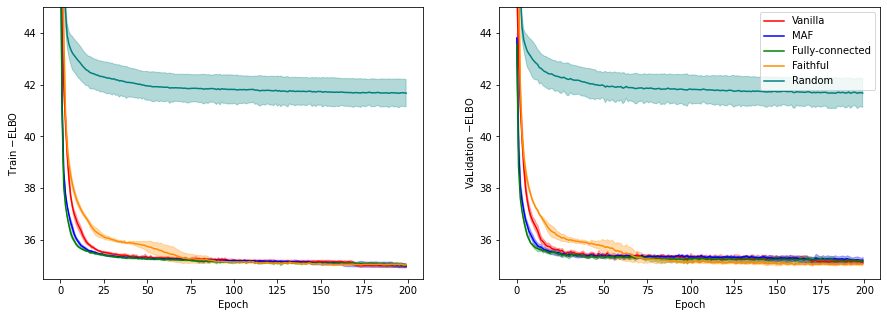

In [8]:
# Plot loss
experiments = [
    'vanilla_vae/ecoli70-alt/[100]_[100]',
    'maf_vae/ecoli70-alt/3_[100]_[100]',
    'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]',
    'siren_vae/ecoli70-alt/random_lipmish_5_[100]_[100]'
]
plot_loss2(experiments, _config={
    'iter':200,
    'ylims':[(34.5,45), (34.5,45)],
    'log_scale':False,
    'legend':['Vanilla', 'MAF', 'Fully-connected', 'Faithful', 'Random'],
}, add_approx_marginal=False)

In [9]:
# Reconstruction Error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'vanilla_vae/ecoli70-alt/[100]_[100]',
    'maf_vae/ecoli70-alt/3_[100]_[100]',
    'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/ecoli70-alt/random_lipmish_5_[100]_[100]',
    'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'Random', 'True']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| EColi70Adapted       | 3.64 (0.01)             | 3.63 (0.01)             | 3.63 (0.01)             | 5.14 (0.29)             | 3.51 (0.01)             |
+----------------------+-------------------------+--------------------

In [10]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                                                                       |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| EColi70Adapted       | 35.03 (0.02)            | 35.04 (0.01)            | 35.03 (0.03)            | 41.63 (0.53)            | 34.99 (0.01)            |
+----------------------+-------------------------+--------------------

#### Arth150 (Synthetic)

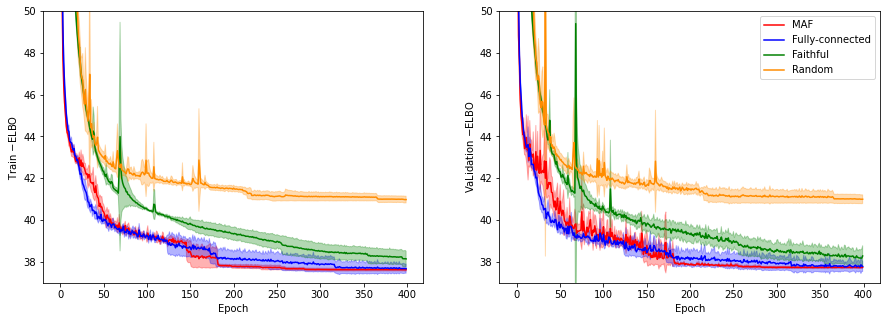

In [13]:
# Plot loss
experiments = [
    # 'vanilla_vae/arth150-synth/[200]_[200]',
    'maf_vae/arth150-synth/3_[200]_[200]',
    'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]',
    'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]',
    'siren_vae/arth150-synth/random_lipmish_5_[200]_[200]'
]
plot_loss2(experiments, _config={
    'iter':400,
    'ylims':[(37,50), (37,50)],
    'log_scale':False,
    'legend':['MAF', 'Fully-connected', 'Faithful', 'Random'],
    'bn':Arth150(),
    'fixed_model_path':'discrete_nf/arth150-synth_dag-masked_monotonic_4_[200]',
    'device':device
}, add_approx_marginal=False)

In [28]:
# Reconstruction Error
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
    'vanilla_vae/arth150-synth/[200]_[200]',
    'maf_vae/arth150-synth/3_[200]_[200]',
    'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]',
    'siren_vae/arth150-synth/random_lipmish_5_[200]_[200]',
    'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'Random', 'True']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| Arth150              | 4.39 (0.03)             | 4.41 (0.02)             | 4.37 (0.02)             | 4.58 (0.02)             | 4.35 (0.01)             |
+----------------------+-------------------------+--------------------

In [29]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                                                                       |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| Arth150              | 37.43 (0.09)            | 37.59 (0.01)            | 37.55 (0.06)            | 40.81 (0.18)            | 37.73 (0.05)            |
+----------------------+-------------------------+--------------------

#### MEHRA (Real)

In [14]:
# Plot loss
experiments = [
    'vanilla_vae/mehra-real/[100]_[100]',
    'maf_vae/mehra-real/3_[100]_[100]',
    'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]',
    'siren_vae/mehra-real/random_lipmish_5_[100]_[100]'
]
ax = plot_loss2(experiments, _config={
    'iter':500,
    'ylims':[(7,9.5), (7,9.5)],
    'log_scale':False,
    'legend':['Vanilla', 'MAF', 'Fully-connected', 'Faithful', 'Random']
}, add_approx_marginal=False)

In [30]:
# Reconstruction Error
experiments = [
    (Mehra(), load_mehra(double=True)[2], [
    'vanilla_vae/mehra-real/[100]_[100]',
    'maf_vae/mehra-real/3_[100]_[100]',
    'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/mehra-real/random_lipmish_5_[100]_[100]',
    'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'Random', 'True']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| Mehra                | 1.25 (0.01)             | 1.25 (0.01)             | 1.25 (0.01)             | 1.70 (0.11)             | 1.42 (0.03)             |
+----------------------+-------------------------+--------------------

In [31]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                                                                       |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| Mehra                | 7.63 (0.01)             | 7.61 (0.02)             | 7.57 (0.01)             | 8.91 (0.24)             | 8.37 (0.06)             |
+----------------------+-------------------------+--------------------

---

<div class="alert alert-block alert-info">

## Investigation 2: Addressing Posterior Collapse

</div>

The VAE Objective:

**Posterior Contrastive Form:** $\quad \ln p_\theta(x) \ge \ln p_\theta(x) - \textrm{KL}(q_\phi(z|x)||p_\theta(z|x)) \qquad (1)$

**Prior Contrastive Form:** $\quad \ln p_\theta(x) \ge \mathbb{E}_{z\sim q} [\ln p_\theta(x|z)] - \textrm{KL}(q_\phi(z|x)||p(z)) \qquad (2)$ 

In practice, the expectation in (2) is _approximated wi.th a single sample_.
Below discussion from [\[1\]](#references).

#### Posterior Collapse

Also referred to as over-pruning/information preference. 
Evident in the prior contrastive ELBO (2).
If the likelihood p(x|z) is able to model the distribution of x without the latents z, then the reconstruction term $\mathbb{E}_{z\sim q} [\ln p_\theta(x|z)]$  is just $\ln p_\theta(x)$ independent of $q(z|x)$.
Since $q$ does not affect the reconstruction term, we can just set it to the prior $p(z)$ so that the KL penalty is 0.
In this case, $q(z|x) = p(z|x)$ is also satisfied, but unfortunately the two posteriors have now “collapsed” to match the prior $p(z)$, which renders the latent variables useless.

##### Causes

> **1. Gradient Noise:** Optimization can be adversely affected by high-variance gradient estimators and minibatch noise in stochastic gradient descent. Unlike minibatch noise, _sampling noise_ - the variance induced by the latents - can be eliminated by ignoring the latents. Coupled with SGD's preference for flat minima, this biases optimization towards posterior collapse.

> **2. Loose Lower Bound:** Posterior contrastive form (1) suggests the ELBO is tight if $q(z|x)$ matches $p(z|x)$, and that the ELBO is looser the worse the approximation is. Factors affecting tightness: 
>> 1. _Approximation Gap_, 
>> 2. _Amortization Gap_ and 
>> 3. _Optimization Gap_.

Posterior collapse reduces all of the above gaps, and also the sampling noise, which makes the bound tight. For VAEs to use their latent variables reliably and optimally, all of the above issues must be addressed. 

#### Potential Solutions

> **1. Gradient Noise:** (1) Reduced variance gradient estimator such as [DReG](https://arxiv.org/abs/1810.04152).

> **2. Loose Lower Bound:** (1) Monte Carlo estimator of the bound (eg [IWAE](https://arxiv.org/abs/1509.00519))

#### Posterior Collapse: Measuring Activity of Latent Units [\[3\]](#references)

If a latent dimension encodes useful information about the data, we would expect its distribution to change depending on the observations. Measure the activity of a latent dimension $z$ using the statistic 

$$
A_z=Cov_{\mathbf{x}}(\mathbb{E}_{z\sim q(z|\mathbf{x})}[z]).
$$

We define the dimension $z$ to be active if $A_z\gt 0.01$.

##### Arithmetic Circuit 2

A_z = ['(0): 2.83982', '(1): 0.00177', '(2): 6.70870', '(3): 0.00476', '(4): 3.78696']
#Inactive Units: 2


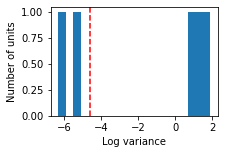

In [7]:
# SIReN-VAE: Check for collapsed latent variables
path = './experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/5/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), 5)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))
plot_unit_variances(A)

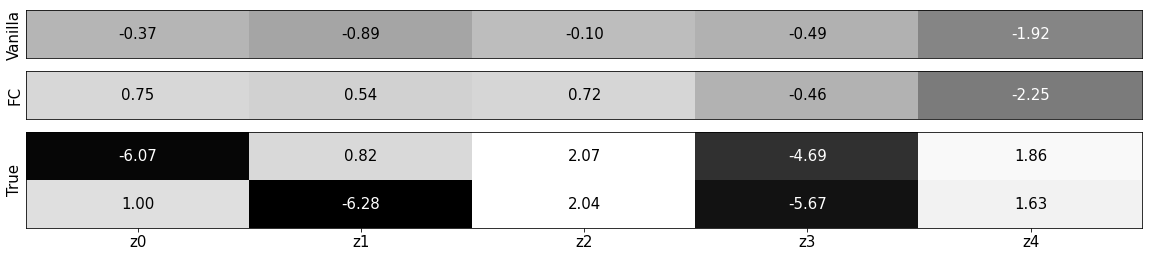

In [ ]:
# visualize average activity
fig, ax = plt.subplots(3,1,figsize=(20,4), gridspec_kw={'height_ratios':[1, 1, 2]})
fontsize = 15
plt.rc('font', size=fontsize)  
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels

As = []

bn = ArithmeticCircuit2()
x = next(iter(load_dataset('arithmetic-circuit2', 100, double=True)[2]))[:,bn.get_num_latent():]

# VAE
A = torch.zeros((5,5))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/vanilla_vae/arithmetic-circuit2/[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 5)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

# SIReN-VAE_FC
A = torch.zeros((5,5))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 5)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

# SIReN-VAE_True
A = torch.zeros((3,5))
for i,run in enumerate([1,2,4]):
    path = './experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 5)
A1 = torch.log(torch.mean(A,dim=0)).reshape(1,-1)

A = torch.zeros((2,5))
for i,run in enumerate([3,5]):
    path = './experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 5)
A2 = torch.log(torch.mean(A,dim=0)).reshape(1,-1)
A = torch.cat([A1,A2],dim=0)
As.append(A)

vmin = min([torch.min(As[i]) for i in range(len(As))])
vmax = max([torch.max(As[i]) for i in range(len(As))])
for i in range(2):
    A = As[i]
    fig = ax[i].matshow(A.reshape(1,-1), cmap='gray', vmin=vmin, vmax=vmax, aspect='auto')
    for j in range(5):
        c = A[j].item()
        if c > -1: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center')
        else: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center', c='w')
    fig.axes.get_xaxis().set_visible(False)
    # fig.axes.get_yaxis().set_visible(False)
    ax[i].set_yticks([])

A = As[-1]
fig = ax[2].matshow(A, cmap='gray', vmin=vmin, vmax=vmax, aspect='auto')
for i in range(2):
    for j in range(5):
        c = A[i,j].item()
        if c > -1: ax[2].text(j, i, '{:.2f}'.format(c), va='center', ha='center')
        else: ax[2].text(j, i, '{:.2f}'.format(c), va='center', ha='center', c='w')
ax[2].set_yticks([])


ax[2].set_xticks(range(5))
ax[2].set_xticklabels(['z{}'.format(i) for i in range(5)])#rotation = 'vertical'
ax[2].xaxis.set_ticks_position('bottom')

ax[0].set_ylabel('Vanilla')
ax[1].set_ylabel('FC')
ax[2].set_ylabel('True')

plt.savefig('./experiment_logs/figures/posterior_collapse/collapsed_latents_arithmetic-circuit.png', dpi=600, bbox_inches='tight', facecolor='white') 
plt.show()

In [ ]:
# visualize average activity
fig, ax = plt.subplots(3,1,figsize=(20,3))
fontsize = 15
plt.rc('font', size=fontsize)  
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels

As = []

bn = ArithmeticCircuit2()
x = next(iter(load_dataset('arithmetic-circuit2', 100, double=True)[2]))[:,bn.get_num_latent():]

# VAE
A = torch.zeros((5,5))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/vanilla_vae/arithmetic-circuit2/[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 5)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

# SIReN-VAE_FC
A = torch.zeros((5,5))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 5)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

# SIReN-VAE_True
A = torch.zeros((3,5))
for i,run in enumerate([1,2,4]):
    path = './experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 5)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

vmin = min([torch.min(As[i]) for i in range(len(As))])
vmax = max([torch.max(As[i]) for i in range(len(As))])
for i in range(3):
    A = As[i]
    fig = ax[i].matshow(A.reshape(1,-1), cmap='gray', vmin=vmin, vmax=vmax, aspect='auto')
    for j in range(5):
        c = A[j].item()
        if c > -1: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center')
        else: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center', c='w')
    if i != 2: fig.axes.get_xaxis().set_visible(False)
    # fig.axes.get_yaxis().set_visible(False)
    ax[i].set_yticks([])



ax[2].set_xticks(range(5))
ax[2].set_xticklabels(['z{}'.format(i) for i in range(5)])#rotation = 'vertical'
ax[2].xaxis.set_ticks_position('bottom')

ax[0].set_ylabel('Vanilla')
ax[1].set_ylabel('FC')
ax[2].set_ylabel('True')
# ax[3].set_ylabel('True')

ax[0].set_title('Arithmetic Circuit 2')

plt.savefig('./experiment_logs/figures/posterior_collapse/collapsed_latents_arithmetic-circuit2.png', dpi=600, bbox_inches='tight', facecolor='white') 
plt.show()

In [7]:
# #Inactive units per model - vanilla vs faithful vs fully-connected vs random
experiments = [
    (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'vanilla_vae/arithmetic-circuit2/[100]_[100]',
    'maf_vae/arithmetic-circuit2/3_[100]_[100]',
    'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/arithmetic-circuit2/random_lipmish_5_[100]_[100]',
    'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'Random', 'True']
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                                                                     |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 2.00 (0.00)             | 0.00 (0.00)             | 0.00 (0.00)             | 1.20 (0.75)             | 2.00 (0.00)             |
+----------------------+-------------------------+--------------------

##### EColi70 Alternative (Synthetic)

A_z = ['(0): 1.17441', '(1): 0.89561', '(2): 3.16006', '(3): 1.52923', '(4): 2.66932', '(5): 6.55600', '(6): 2.55516', '(7): 3.34894', '(8): 5.75260', '(9): 4.24164', '(10): 3.42025', '(11): 4.54175', '(12): 3.34941', '(13): 8.40780', '(14): 14.13769']
#Inactive Units: 0


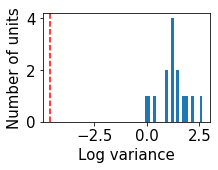

In [ ]:
# SIReN-VAE: Check for collapsed latent variables
path = './experiment_logs/siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]/1/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), 15)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))
plot_unit_variances(A)

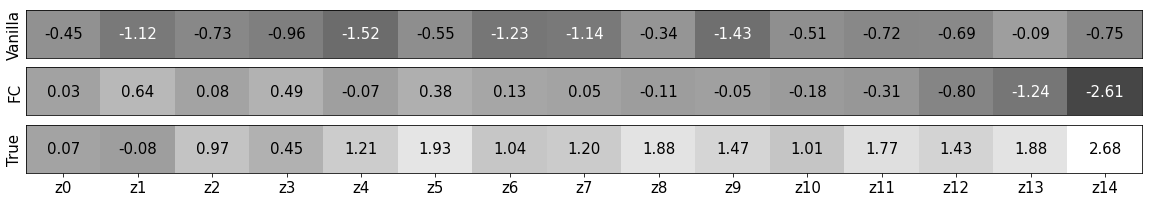

In [ ]:
# visualize average activity
fig, ax = plt.subplots(3,1,figsize=(20,3))
fontsize = 15
plt.rc('font', size=fontsize)  
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
As = []

bn = EColi70Adapted()
x = next(iter(load_dataset('ecoli70-alt', 100, double=True)[2]))[:,bn.get_num_latent():]

# VAE
A = torch.zeros((5,15))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/vanilla_vae/ecoli70-alt/[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 15)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

# SIReN-VAE_FC
A = torch.zeros((5,15))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 15)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

A = torch.zeros((5,15))
for i,run in enumerate(range(1,6)):
    path = './experiment_logs/siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]/{}/'.format(run)
    model =load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 15)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

vmin = min([torch.log(torch.tensor([0.01]))]+[torch.min(As[i]) for i in range(len(As))])
vmax = max([torch.max(As[i]) for i in range(len(As))])
for i in range(3):
    A = As[i]
    fig = ax[i].matshow(A.reshape(1,-1), cmap='gray', vmin=vmin, vmax=vmax, aspect='auto')
    for j in range(15):
        c = A[j].item()
        if c > -1: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center')
        else: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center', c='w')
    if i != 2: fig.axes.get_xaxis().set_visible(False)
    # fig.axes.get_yaxis().set_visible(False)
    ax[i].set_yticks([])

ax[2].set_xticks(range(15))
ax[2].set_xticklabels(['z{}'.format(i) for i in range(15)])#rotation = 'vertical'
ax[2].xaxis.set_ticks_position('bottom')

ax[0].set_ylabel('Vanilla')
ax[1].set_ylabel('FC')
ax[2].set_ylabel('True')

plt.savefig('./experiment_logs/figures/posterior_collapse/collapsed_latents_ecoli70-alt.png', dpi=600, bbox_inches='tight', facecolor='white') 
plt.show()

In [12]:
# #Inactive units per model - vanilla vs faithful vs fully-connected vs random
experiments = [ 
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'vanilla_vae/ecoli70-alt/[100]_[100]',
    'maf_vae/ecoli70-alt/3_[100]_[100]',
    'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/ecoli70-alt/random_lipmish_5_[100]_[100]',
    'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]'
])
]
headings = ['Vanilla', 'MAF',  'FC', 'Random', 'True']
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                                                                     |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| EColi70Adapted       | 5.00 (1.26)             | 0.00 (0.00)             | 0.00 (0.00)             | 1.80 (1.47)             | 0.00 (0.00)             |
+----------------------+-------------------------+--------------------

##### Arth150 (Synthetic)

A_z = ['(0): 0.00175', '(1): 0.11782', '(2): 0.03649', '(3): 0.00296', '(4): 0.06923', '(5): 0.00359', '(6): 0.47597', '(7): 0.00257', '(8): 0.81368', '(9): 0.10965', '(10): 0.02304', '(11): 0.00380', '(12): 0.00398', '(13): 0.14404', '(14): 0.01065', '(15): 0.34344', '(16): 0.03203', '(17): 0.11010', '(18): 0.00327', '(19): 0.76656', '(20): 0.34672', '(21): 0.06596', '(22): 0.06429', '(23): 0.00373', '(24): 0.04777', '(25): 0.18069', '(26): 0.02739', '(27): 0.00482', '(28): 0.00226', '(29): 0.13347', '(30): 0.00249', '(31): 0.23059', '(32): 0.00603', '(33): 1.11266', '(34): 0.01271', '(35): 0.07123', '(36): 0.14550', '(37): 0.15384', '(38): 0.30929', '(39): 0.00474']
#Inactive Units: 13


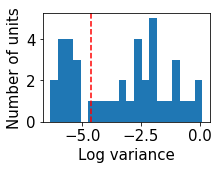

In [ ]:
# SIReN-VAE: Check for collapsed latent variables
path = './experiment_logs/siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]/2/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), 40)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))
plot_unit_variances(A)

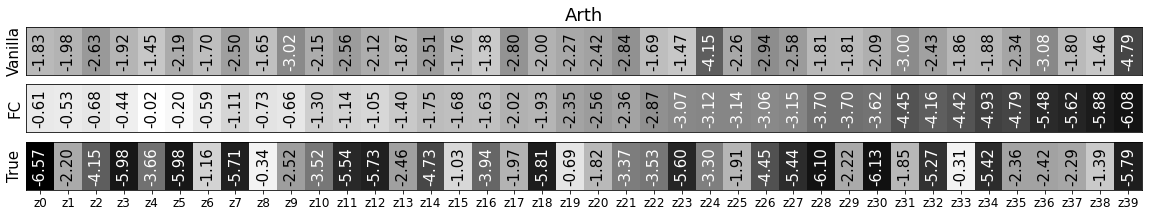

In [ ]:
# visualize average activity
fig, ax = plt.subplots(3,1,figsize=(20,3))
fontsize = 15
plt.rc('font', size=fontsize)  
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize-3)    # fontsize of the tick labels
As = []

bn = Arth150()
x = next(iter(load_dataset('arth150-synth', 100, double=True)[2]))[:,bn.get_num_latent():]

# VAE
A = torch.zeros((20,40))
for i,run in enumerate(range(1,21)):
    path = './experiment_logs/vanilla_vae/arth150-synth/[200]_[200]/additional runs/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    A[i,:] = get_units_variances(model, x.double().to(device), 40)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

# SIReN-VAE_FC
A = torch.zeros((5,40))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    A[i,:] = get_units_variances(model, x.double().to(device), 40)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

A = torch.zeros((5,40))
for i,run in enumerate(range(1,5)):
    path = './experiment_logs/siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    # x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 40)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

vmin = min([torch.min(As[i]) for i in range(len(As))])
vmax = max([torch.max(As[i]) for i in range(len(As))])
for i in range(3):
    A = As[i]
    fig = ax[i].matshow(A.reshape(1,-1), cmap='gray', vmin=vmin, vmax=vmax, aspect='auto')
    for j in range(40):
        c = A[j].item()
        if c > -3: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center', rotation=90)
        else: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center', c='w', rotation=90)
    if i != 2: fig.axes.get_xaxis().set_visible(False)
    # fig.axes.get_yaxis().set_visible(False)
    ax[i].set_yticks([])

ax[2].set_xticks(range(40))
ax[2].set_xticklabels(['z{}'.format(i) for i in range(40)])#rotation = 'vertical'
ax[2].xaxis.set_ticks_position('bottom')

ax[0].set_ylabel('Vanilla')
ax[1].set_ylabel('FC')
ax[2].set_ylabel('True')

ax[0].set_title('Arth')

plt.savefig('./experiment_logs/figures/posterior_collapse/collapsed_latents_arth150-synth2.png',dpi=600, bbox_inches='tight', facecolor='white') 
plt.show()

In [16]:
# #Inactive units per model - vanilla vs faithful vs fully-connected vs random
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
    'vanilla_vae/arth150-synth/[200]_[200]',
    'maf_vae/arth150-synth/3_[200]_[200]',
    'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]',
    'siren_vae/arth150-synth/random_lipmish_5_[200]_[200]',
    'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'Random', 'True']
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                                                                     |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| Arth150              | 23.40 (5.39)            | 1.80 (1.17)             | 7.20 (2.40)             | 5.20 (2.04)             | 14.80 (1.33)            |
+----------------------+-------------------------+--------------------

#### Mehra (Real)

A_z = ['(0): 4.16675', '(1): 1.51284', '(2): 2.56958']
#Inactive Units: 0


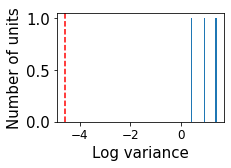

In [ ]:
# SIReN-VAE: Check for collapsed latent variables
path = './experiment_logs/siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]/1/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), 3)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))
plot_unit_variances(A)

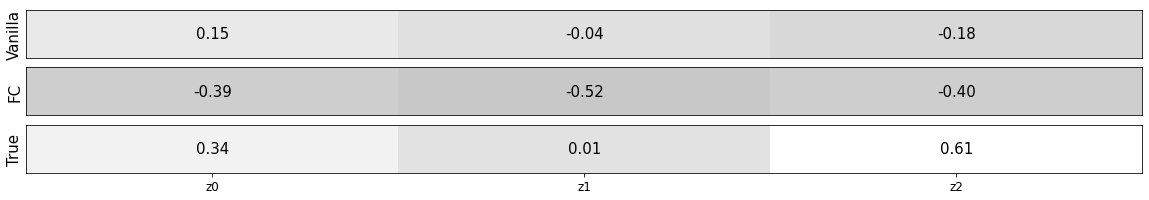

In [ ]:
# visualize average activity
fig, ax = plt.subplots(3,1,figsize=(20,3))
fontsize = 15
plt.rc('font', size=fontsize)  
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
As = []

# VAE
A = torch.zeros((5,3))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/vanilla_vae/mehra-real/[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 3)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

# SIReN-VAE_FC
A = torch.zeros((5,3))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 3)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

# SIReN-VAE_True
A = torch.zeros((5,3))
for i,run in enumerate([1,2,3,4,5]):
    path = './experiment_logs/siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]/{}/'.format(run)
    model = load_model(path + 'model.pt', device)
    torch.manual_seed(1)
    x,_ = model.sample(100)
    A[i,:] = get_units_variances(model, x.double().to(device), 3)
A = torch.log(torch.mean(A,dim=0))
As.append(A)

vmin = min([torch.log(torch.tensor([0.01]))]+[torch.min(As[i]) for i in range(len(As))])
vmax = max([torch.max(As[i]) for i in range(len(As))])
for i in range(3):
    A = As[i]
    fig = ax[i].matshow(A.reshape(1,-1), cmap='gray', vmin=vmin, vmax=vmax, aspect='auto')
    for j in range(3):
        c = A[j].item()
        if c > -1: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center')
        else: ax[i].text(j, 0, '{:.2f}'.format(c), va='center', ha='center', c='w')
    if i != 2: fig.axes.get_xaxis().set_visible(False)
    # fig.axes.get_yaxis().set_visible(False)
    ax[i].set_yticks([])

ax[2].set_xticks(range(3))
ax[2].set_xticklabels(['z{}'.format(i) for i in range(3)])#rotation = 'vertical'
ax[2].xaxis.set_ticks_position('bottom')

ax[0].set_ylabel('Vanilla')
ax[1].set_ylabel('FC')
ax[2].set_ylabel('True')

plt.savefig('./experiment_logs/figures/posterior_collapse/collapsed_latents_mehra.png',
                    dpi=600, bbox_inches='tight', facecolor='white') 
plt.show()

In [32]:
#Inactive units per model - vanilla vs faithful vs fully-connected vs random
experiments = [
    (Mehra(), load_mehra(double=True)[2], [
    'vanilla_vae/mehra-real/[100]_[100]',
    'maf_vae/mehra-real/3_[100]_[100]',
    'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]',
    'siren_vae/mehra-real/random_lipmish_5_[100]_[100]',
    'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'Random', 'True']
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                                                                     |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | Random                  | True                    |
+======================+=========================+=========================+=========================+=========================+=========================+
| Mehra                | 0.00 (0.00)             | 0.00 (0.00)             | 0.00 (0.00)             | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+--------------------

### 1. Warm-Up

From Sønderby et al. ([\[2\]](#references)): 

> We show that a deterministic warm-up period and batch normalization are important for training deep stochastic models.

> The variational training criterion in Eq. (5) contains the reconstruction term $p_\theta(x|z)$ and the variational regularization term. The variational regularization term causes some of the latent units to become inactive during training because the approximate posterior for unit $k$, $q(z_{i}|\ldots)$ is regularized towards its own prior $p(z_{i}|\ldots)$, a phenomenon also recognized in the VAE setting. This can be seen as a virtue of automatic relevance determination, but also as a problem when many units collapse early in training before they learned a useful representation. We observed that such units remain inactive for the rest of the training, presumably trapped in a local minima or saddle point at $\textrm{KL}(q_{i}|p_{i}) \approx 0$, with the optimization algorithm unable to re-activate them.

**Prior Contrastive Form:** $\quad \mathcal{L}_{\theta, \phi} = -\mathbb{E}_{z\sim q} [\ln p_\theta(x|z)] + \textrm{KL}(q_\phi(z|x)||p(z))$ 

Add **Warm-up** term, $\beta$:

$$
\mathcal{L}_{\theta, \phi} = - \mathbb{E}_{z\sim q} [\ln p_\theta(x|z)] + \beta \cdot\textrm{KL}(q_\phi(z|x)||p(z))
$$

where $\beta$ is increased linearly from 0 to 1 during the first $N$ epochs.

##### Arithmetic Circuit 2

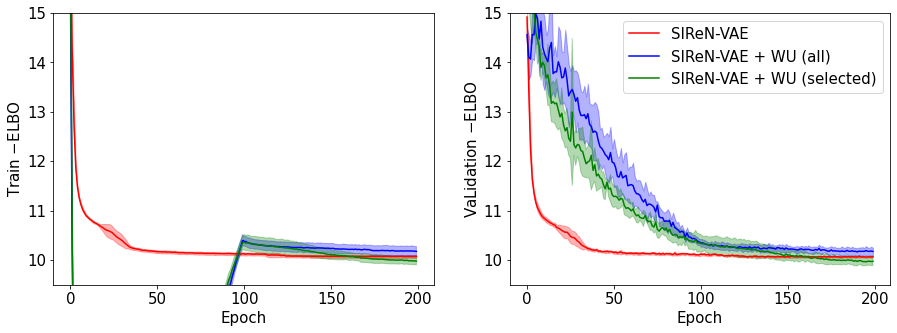

In [ ]:
# Plot loss
experiments = [
    'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]',
    'siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_100N_all',
    'siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_100N_selected',
]
plot_loss2(experiments, _config={
    'iter': 200,
    'ylims': [(9.5,15), (9.5,15)],
    'log_scale': False,
    'legend': ['SIReN-VAE', 'SIReN-VAE + WU (all)', 'SIReN-VAE + WU (selected)'],
    'objective': r'$-$ELBO'
}, add_approx_marginal=False)

In [ ]:
# Reconstruction error
experiments = [
   (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_100N_selected',
    'siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_100N_all',
    'siren_vae_wu/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_100N_all',
])
]
headings = ['SIReN-VAE+WU_s', 'SIReN-VAE+WU_a', 'SIReN-VAE+WU (FC)']
print_metric(experiments, headings, 'recon_err', device)

+----------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                               |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_s          | SIReN-VAE+WU_a          | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 2.87 (0.00)             | 2.79 (0.03)             | 1.92 (0.14)             |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+----------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_s          | SIReN-VAE+WU_a          | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 9.82 (0.02)             | 10.11 (0.08)            | 10.32 (0.12)            |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+----------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                 |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_s          | SIReN-VAE+WU_a          | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 0.00 (0.00)             | 1.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+-------------------------+


##### EColi70 Alternative (Synthetic)

In [ ]:
# Reconstruction error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'siren_vae_wu/ecoli70-alt/faithful_lipmish_5_[100]_[100]_100N_all',
    'siren_vae_wu/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_100N_all',
])
]
headings = ['SIReN-VAE+WU (True) ', 'SIReN-VAE+WU (FC)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU (True)     | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+
| EColi70Adapted       | 3.36 (0.03)             | 3.41 (0.16)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU (True)     | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+
| EColi70Adapted       | 34.99 (0.01)            | 35.03 (0.01)            |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU (True)     | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+
| EColi70Adapted       | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


##### Arth150 (Synthetic)

In [ ]:
# Reconstruction error
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
        'siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_75N_all',
        'siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_75N_selected',
        'siren_vae_wu/arth150-synth/fully-connected_lipmish_5_[200]_[200]_100N_all'
])
]
headings = ['SIReN-VAE+WU_a', 'SIReN-VAE+WU_s', 'SIReN-VAE+WU (FC)']
print_metric(experiments, headings, 'recon_err', device)

+----------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                               |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_a          | SIReN-VAE+WU_s          | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+=========================+
| Arth150              | 4.24 (0.03)             | 4.37 (0.00)             | 3.73 (0.21)             |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+----------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_a          | SIReN-VAE+WU_s          | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+=========================+
| Arth150              | 37.65 (0.08)            | 37.71 (0.03)            | 37.33 (0.02)            |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+----------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                 |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_a          | SIReN-VAE+WU_s          | SIReN-VAE+WU (FC)       |
+======================+=========================+=========================+=========================+
| Arth150              | 11.20 (0.98)            | 9.80 (2.64)             | 3.40 (1.02)             |
+----------------------+-------------------------+-------------------------+-------------------------+


##### MEHRA (Real)

In [ ]:
# Reconstruction error
experiments = [
    (Mehra(), load_mehra(double=True)[2], [
    'siren_vae_wu/mehra-real/faithful_lipmish_5_[100]_[100]_100N_all',
    'siren_vae_wu/mehra-real/fully-connected_lipmish_5_[100]_[100]_100N_all'
])
]
headings = ['SIReN-VAE+WU_a', 'SIReN-VAE+WU_a (FC)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_a          | SIReN-VAE+WU_a (FC)     |
+======================+=========================+=========================+
| Mehra                | 1.58 (0.05)             | 1.31 (0.06)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_a          | SIReN-VAE+WU_a (FC)     |
+======================+=========================+=========================+
| Mehra                | 8.70 (0.26)             | 7.95 (0.12)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# #Inactive units per model - vanilla vs faithful vs fully-connected vs random
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-VAE+WU_a          | SIReN-VAE+WU_a (FC)     |
+======================+=========================+=========================+
| Mehra                | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


### 1. SIReN-IWAE

Original ELBO objective to maximize (corresponding to 1 MC sample):
$$
\mathcal{L}_1 = \mathbb{E}_{z\sim q}[\log p(x,z) - \log q(z|x)]
$$

Importance weighted objective [\[3\]](#references):
$$
\begin{align}
\mathcal{L}_k &= \mathbb{E}_{z_{1,\ldots,k}\sim q}\left[\log \frac{1}{k} \sum_{i=1}^k \frac{p(x,z_i)}{q(z_i|x)}\right] \\
&= \mathbb{E}_{z_{1,\ldots,k}\sim q}\left[-\log k + \underbrace{\log\left(\sum_{i=1}^k \exp\left\{\log p(x, z_i) - \log q(z_i|x)\right\}\right)}_\textrm{log-sum-exp}\right]
\end{align}
$$

Using more samples can only improve the tightness of the bound $\mathcal{L}_k\le\log p(x)$.

##### Arithmetic-Circuit 2

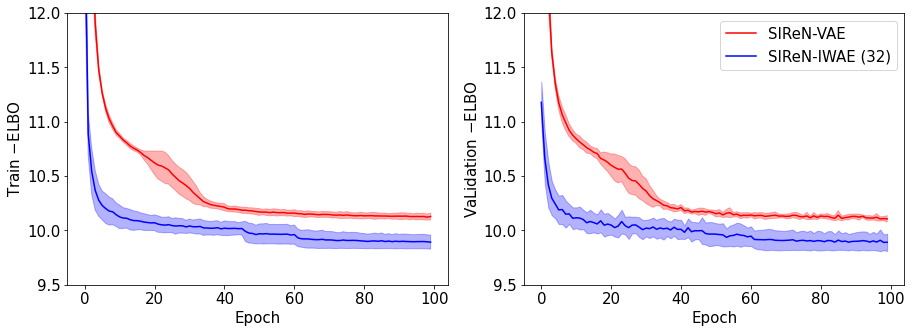

In [ ]:
# IW-SIReN-VAE: Plot loss
experiments = [
    'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]',
    'iw_siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k',
]
plot_loss2(experiments, _config={
    'iter':100,
    'ylims':[(9.5,12), (9.5,12)],
    'log_scale':False,
    'legend':['SIReN-VAE', 'SIReN-IWAE (32)']
}, add_approx_marginal=False)

In [ ]:
# SIReN-IWAE (32): Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k/1/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), 5)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))
plot_unit_variances(A)

A_z = ['(0): 0.00363', '(1): 1.57121', '(2): 1.25691', '(3): 3.85705', '(4): 3.71561']
#Inactive Units: 1


In [ ]:
# Reconstruction error
experiments = [
    (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'iw_siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k',
    'iw_siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_8k',
])
]
headings = ['SIReN-IWAE (32)', 'SIReN-IWAE (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (32)         | SIReN-IWAE (FC,32)      |
+======================+=========================+=========================+
| ArithmeticCircuit2   | 2.97 (0.05)             | 2.88 (0.00)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (32)         | SIReN-IWAE (FC,32)      |
+======================+=========================+=========================+
| ArithmeticCircuit2   | 9.86 (0.04)             | 9.73 (0.01)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (32)         | SIReN-IWAE (FC,32)      |
+======================+=========================+=========================+
| ArithmeticCircuit2   | 1.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


##### EColi70 Alternative (Synthetic)

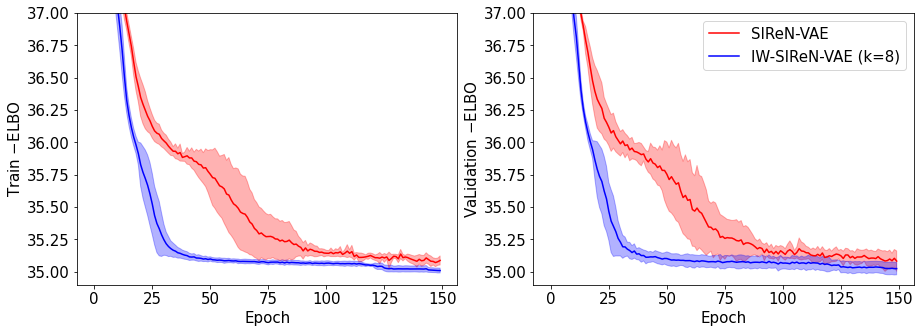

In [ ]:
# SIReN-IWAE: Plot loss
experiments = [
    'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]',
    'iw_siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k',
]
plot_loss2(experiments, _config={
    'iter':150,
    'ylims':[(34.9,37), (34.9,37)],
    'log_scale':False,
    'legend':['SIReN-VAE', 'IW-SIReN-VAE (k=8)'],
}, add_approx_marginal=False)

In [ ]:
# Reconstruction error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'iw_siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k',
    'iw_siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_8k',
])
]
headings = ['SIReN-IWAE (8)', 'SIReN-IWAE (FC,8)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (8)          | SIReN-IWAE (FC,8)       |
+======================+=========================+=========================+
| EColi70Adapted       | 3.52 (0.01)             | 3.62 (0.01)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (8)          | SIReN-IWAE (FC,8)       |
+======================+=========================+=========================+
| EColi70Adapted       | 34.98 (0.00)            | 35.04 (0.01)            |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (8)          | SIReN-IWAE (FC,8)       |
+======================+=========================+=========================+
| EColi70Adapted       | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


##### Arth150 (Synthetic)

#Inactive Units: 11


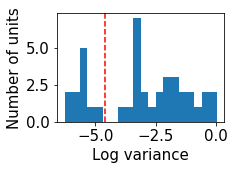

In [ ]:
# SIReN-IWAE (8): Check for collapsed latent variables
torch.cuda.empty_cache()
path = './experiment_logs/iw_siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]_8k/1/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), 40)
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))
plot_unit_variances(A)

In [ ]:
# Reconstruction error
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
    'iw_siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]_8k',
    'iw_siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]_8k',
])
]
headings = ['SIReN-IWAE (8)', 'SIReN-IWAE (FC,8)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (8)          | SIReN-IWAE (FC,8)       |
+======================+=========================+=========================+
| Arth150              | 4.34 (0.01)             | 4.37 (0.04)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (8)          | SIReN-IWAE (FC,8)       |
+======================+=========================+=========================+
| Arth150              | 37.49 (0.26)            | 37.23 (0.08)            |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (8)          | SIReN-IWAE (FC,8)       |
+======================+=========================+=========================+
| Arth150              | 11.00 (1.10)            | 13.80 (2.23)            |
+----------------------+-------------------------+-------------------------+


#### Mehra (Real)

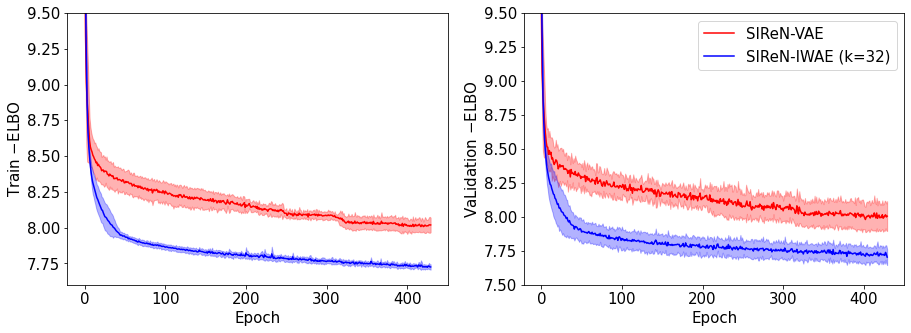

In [ ]:
# SIReN-IWAE: Plot loss
experiments = [
    'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]',
    'iw_siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32k'
]
ax = plot_loss2(experiments, _config={
    'iter':430,
    'ylims':[(7.6,9.5), (7.5,9.5)],
    'log_scale':False,
    'legend':['SIReN-VAE', 'SIReN-IWAE (k=32)']
}, add_approx_marginal=False)

#Inactive Units: 0


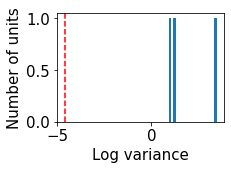

In [ ]:
# IW-SIReN-VAE (32): Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32k/1/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.to(device), 3)
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))
plot_unit_variances(A)

In [ ]:
# Reconstruction error
experiments = [
    (Mehra(), load_mehra(device, double=True)[2], [
    'iw_siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32k',
    'iw_siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]_32k',
])
]
headings = ['SIReN-IWAE (32)', 'SIReN-IWAE (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (32)         | SIReN-IWAE (FC,32)      |
+======================+=========================+=========================+
| Mehra                | 1.70 (0.05)             | 1.33 (0.02)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (32)         | SIReN-IWAE (FC,32)      |
+======================+=========================+=========================+
| Mehra                | 8.18 (0.06)             | 7.57 (0.03)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE (32)         | SIReN-IWAE (FC,32)      |
+======================+=========================+=========================+
| Mehra                | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


### 3. SIReN-IWAE + WU

##### Arithmetic Circuit 2

In [ ]:
# Reconstruction error
experiments = [
    (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'iw_siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected',
    'iw_siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_all',
    'iw_siren_vae_wu/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_8k_100N_all',
])
]
headings = ['SIReN-IWAE + WU_s (32)', 'SIReN-IWAE + WU_a (32)', 'SIReN-IWAE + WU (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+----------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                               |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE + WU_s (32)  | SIReN-IWAE + WU_a (32)  | SIReN-IWAE + WU (FC,32) |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 2.88 (0.00)             | 2.83 (0.05)             | 2.39 (0.42)             |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+----------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE + WU_s (32)  | SIReN-IWAE + WU_a (32)  | SIReN-IWAE + WU (FC,32) |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 9.80 (0.00)             | 9.86 (0.08)             | 9.85 (0.20)             |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+----------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                 |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE + WU_s (32)  | SIReN-IWAE + WU_a (32)  | SIReN-IWAE + WU (FC,32) |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 0.00 (0.00)             | 1.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+-------------------------+


##### EColi70 (Alternative)

In [ ]:
# Reconstruction error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'iw_siren_vae_wu/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k_100N_all',
    'iw_siren_vae_wu/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_8k_100N_all',
])
]
headings = ['SIReN-IWAE+WU (32)', 'SIReN-IWAE+WU (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE+WU (32)      | SIReN-IWAE+WU (FC,32)   |
+======================+=========================+=========================+
| EColi70Adapted       | 3.36 (0.02)             | 3.28 (0.11)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE+WU (32)      | SIReN-IWAE+WU (FC,32)   |
+======================+=========================+=========================+
| EColi70Adapted       | 34.99 (0.01)            | 35.07 (0.01)            |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE+WU (32)      | SIReN-IWAE+WU (FC,32)   |
+======================+=========================+=========================+
| EColi70Adapted       | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


##### Arth150 (Synth)

In [ ]:
# reconstruction error
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
    'iw_siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected',
    'iw_siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_all',
    'iw_siren_vae_wu/arth150-synth/fully-connected_lipmish_5_[200]_[200]_8k_100N_all'
])
]
headings = ['SIReN-IWAE + WU_s (32)', 'SIReN-IWAE + WU_a (32)', 'SIReN-IWAE + WU (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+----------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                               |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE + WU_s (32)  | SIReN-IWAE + WU_a (32)  | SIReN-IWAE + WU (FC,32) |
+======================+=========================+=========================+=========================+
| Arth150              | 4.35 (0.00)             | 4.24 (0.03)             | 3.70 (0.24)             |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+----------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE + WU_s (32)  | SIReN-IWAE + WU_a (32)  | SIReN-IWAE + WU (FC,32) |
+======================+=========================+=========================+=========================+
| Arth150              | 37.42 (0.24)            | 37.47 (0.47)            | 37.21 (0.14)            |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+----------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                 |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE + WU_s (32)  | SIReN-IWAE + WU_a (32)  | SIReN-IWAE + WU (FC,32) |
+======================+=========================+=========================+=========================+
| Arth150              | 7.00 (2.28)             | 10.20 (1.33)            | 2.40 (2.15)             |
+----------------------+-------------------------+-------------------------+-------------------------+


##### MEHRA (Real)

In [ ]:
# Reconstruction error
experiments = [
    (Mehra(), load_mehra(double=True)[2], [
    'iw_siren_vae_wu/mehra-real/faithful_lipmish_5_[100]_[100]_32k_100N_all',
    'iw_siren_vae_wu/mehra-real/fully-connected_lipmish_5_[100]_[100]_32k_100N_all'
])
]
headings = ['SIReN-IWAE+WU_a (32)', 'SIReN-IWAE+WU_a (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE+WU_a (32)    | SIReN-IWAE+WU_a (FC,32) |
+======================+=========================+=========================+
| Mehra                | 1.73 (0.05)             | 1.32 (0.01)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE+WU_a (32)    | SIReN-IWAE+WU_a (FC,32) |
+======================+=========================+=========================+
| Mehra                | 8.39 (0.24)             | 7.61 (0.03)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# #Inactive units per model - vanilla vs faithful vs fully-connected vs random
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE+WU_a (32)    | SIReN-IWAE+WU_a (FC,32) |
+======================+=========================+=========================+
| Mehra                | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


### 4. Importance Weighted SIReN-VAE with DReG Gradient Estimator (SIReN-IWAE DReG)

https://yugeten.github.io/posts/2020/06/elbo/

The [article](https://arxiv.org/pdf/1810.04152.pdf).

[Generalized DReG](https://openreview.net/pdf?id=epqs2X317ta) -> future work + provides better discussion on what is going on in DReG paper.

##### Arithmetic-Circuit 2

In [ ]:
# SIReN-IWAE-DReG (32): Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae_dreg/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k/1/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), 5)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))
plot_unit_variances(A)

A_z = ['(0): 0.00160', '(1): 1.02927', '(2): 2.18423', '(3): 0.17166', '(4): 1.65681']
#Inactive Units: 1


In [ ]:
# Reconstruction error
experiments = [
    (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'iw_siren_vae_dreg/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k',
    'iw_siren_vae_dreg/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_8k',
])
]
headings = ['SIReN-IWAE-DReG (32)', 'SIReN-IWAE-DReG (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| ArithmeticCircuit2   | 2.93 (0.01)             | 2.88 (0.01)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# negative log-likelihood
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| ArithmeticCircuit2   | 9.80 (0.02)             | 9.73 (0.00)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| ArithmeticCircuit2   | 1.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


##### EColi70 Alternative (Synthetic)

In [ ]:
# Reconstruction error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'iw_siren_vae_dreg/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k',
    'iw_siren_vae_dreg/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_8k',
])
]
headings = ['SIReN-IWAE-DReG (8)', 'SIReN-IWAE-DReG (FC,8)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (8)     | SIReN-IWAE-DReG (FC,8)  |
+======================+=========================+=========================+
| EColi70Adapted       | 3.56 (0.01)             | 3.61 (0.02)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (8)     | SIReN-IWAE-DReG (FC,8)  |
+======================+=========================+=========================+
| EColi70Adapted       | 34.98 (0.01)            | 35.06 (0.01)            |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (8)     | SIReN-IWAE-DReG (FC,8)  |
+======================+=========================+=========================+
| EColi70Adapted       | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


##### Arth150 (Synthetic)

In [ ]:
# Reconstruction error
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
    'iw_siren_vae_dreg/arth150-synth/faithful_lipmish_5_[200]_[200]_8k',
    'iw_siren_vae_dreg/arth150-synth/fully-connected_lipmish_5_[200]_[200]_8k',
])
]
headings = ['SIReN-IWAE-DReG (32)', 'SIReN-IWAE-DReG (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Arth150              | 4.31 (0.02)             | 4.33 (0.01)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Arth150              | 37.30 (0.53)            | 37.08 (0.00)            |
+----------------------+-------------------------+-------------------------+


In [ ]:
# inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Arth150              | 6.00 (1.41)             | 13.60 (3.38)            |
+----------------------+-------------------------+-------------------------+


#### Mehra (Real)

In [ ]:
# Reconstruction Error
experiments = [
    (Mehra(), load_mehra(double=True)[2], [
    'iw_siren_vae_dreg/mehra-real/faithful_lipmish_5_[100]_[100]_32k',
    'iw_siren_vae_dreg/mehra-real/fully-connected_lipmish_5_[100]_[100]_32k'
])
]
headings = ['SIReN-IWAE-DReG (32)', 'SIReN-IWAE-DReG (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Mehra                | 1.63 (0.03)             | 1.32 (0.01)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Mehra                | 8.12 (0.03)             | 7.55 (0.03)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive Units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Mehra                | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


### 5. IW-SIReN-VAE-DReG + WU

##### Arithmetic Circuit 2

In [ ]:
# Reconstruction error
experiments = [
    (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'iw_siren_vae_dreg_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected',
    'iw_siren_vae_dreg_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_all',
    'iw_siren_vae_dreg_wu/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_8k_100N_all',
])
]
headings = ['SIReN-IWAE-DReG+WUs(32)', 'SIReN-IWAE-DReG+WUa(32)', 'SIReN-IWAE-DReG+WUa(FC)']
print_metric(experiments, headings, 'recon_err', device)

+----------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                               |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WUs(32) | SIReN-IWAE-DReG+WUa(32) | SIReN-IWAE-DReG+WUa(FC) |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 2.88 (0.01)             | 2.88 (0.07)             | 2.54 (0.22)             |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+----------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WUs(32) | SIReN-IWAE-DReG+WUa(32) | SIReN-IWAE-DReG+WUa(FC) |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 9.80 (0.02)             | 9.88 (0.06)             | 9.75 (0.01)             |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+----------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                 |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WUs(32) | SIReN-IWAE-DReG+WUa(32) | SIReN-IWAE-DReG+WUa(FC) |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 0.00 (0.00)             | 1.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+-------------------------+


##### EColi70 Alternative (Synthetic)

In [ ]:
# Reconstruction error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'iw_siren_vae_dreg_wu/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k_100N_all',
    'iw_siren_vae_dreg_wu/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_8k_100N_all',
])
]
headings = ['SIReN-IWAE-DReG+WU (32)','SIReN-IWAE-DReG+WU (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WU (32) | SIReN-IWAE-DReG+WU (FC,32) |
+======================+=========================+=========================+
| EColi70Adapted       | 3.33 (0.11)             | 2.94 (0.10)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WU (32) | SIReN-IWAE-DReG+WU (FC,32) |
+======================+=========================+=========================+
| EColi70Adapted       | 34.99 (0.00)            | 35.13 (0.04)            |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WU (32) | SIReN-IWAE-DReG+WU (FC,32) |
+======================+=========================+=========================+
| EColi70Adapted       | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


##### Arth150 (Synthetic)

In [ ]:
# Reconstruction error
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
    'iw_siren_vae_dreg_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected',
    'iw_siren_vae_dreg_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_all',
    'iw_siren_vae_dreg_wu/arth150-synth/fully-connected_lipmish_5_[200]_[200]_8k_100N_all'
])
]
headings = ['SIReN-IWAE-DReG+WUs(8)', 'SIReN-IWAE-DReG+WUa(8)', 'SIReN-IWAE-DReG+WU (FC)']
print_metric(experiments, headings, 'recon_err', device)

+----------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                               |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WUs(8)  | SIReN-IWAE-DReG+WUa(8)  | SIReN-IWAE-DReG+WU (FC) |
+======================+=========================+=========================+=========================+
| Arth150              | 4.32 (0.02)             | 4.19 (0.01)             | 3.62 (0.17)             |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+----------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WUs(8)  | SIReN-IWAE-DReG+WUa(8)  | SIReN-IWAE-DReG+WU (FC) |
+======================+=========================+=========================+=========================+
| Arth150              | 37.43 (0.22)            | 37.27 (0.54)            | 37.13 (0.02)            |
+----------------------+-------------------------+-------------------------+-------------------------+


In [ ]:
# Inactive units
print_metric(experiments, headings, 'inactive_units', device)

+----------------------------------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                                                 |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG+WUs(8)  | SIReN-IWAE-DReG+WUa(8)  | SIReN-IWAE-DReG+WU (FC) |
+======================+=========================+=========================+=========================+
| Arth150              | 1.80 (0.98)             | 7.80 (1.33)             | 1.00 (1.10)             |
+----------------------+-------------------------+-------------------------+-------------------------+


##### MEHRA (Real)

In [ ]:
# Reconstruction Error
experiments = [
    (Mehra(), load_mehra(double=True)[2], [
    'iw_siren_vae_dreg_wu/mehra-real/faithful_lipmish_5_[100]_[100]_32k_100N_all',
    'iw_siren_vae_dreg_wu/mehra-real/fully-connected_lipmish_5_[100]_[100]_32k_100N_all'
])
]
headings = ['SIReN-IWAE-DReG (32)', 'SIReN-IWAE-DReG (FC,32)']
print_metric(experiments, headings, 'recon_err', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Mehra                | 1.64 (0.05)             | 1.31 (0.01)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# NLL
print_metric(experiments, headings, 'nll', device)

+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Mehra                | 8.23 (0.08)             | 7.58 (0.03)             |
+----------------------+-------------------------+-------------------------+


In [ ]:
# Inactive Units
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| NUM INACTIVE UNITS                                                       |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | SIReN-IWAE-DReG (32)    | SIReN-IWAE-DReG (FC,32) |
+======================+=========================+=========================+
| Mehra                | 0.00 (0.00)             | 0.00 (0.00)             |
+----------------------+-------------------------+-------------------------+


---

<div class="alert alert-block alert-info">

## Investigation 3: Performance in Data Sparse Settings

</div>

Dataset sizes:

|         BN                      | #Vertices | 2x\|G\| | 8x\|G\| | 32x\|G\| | 128x\|G\| | 512x\|G\| |
| ------------------------------- | --------- | ----- | ----- | ------ | ------- | ------- |
| Arithmetic-Circuit 2            | 15        | 30    | 120   | 480    | 1920    | 7680    |
| EColi70 Alternative (Synthetic) | 44        | 88    | 352   | 1408   | 5632    | 22528   |
| Arth150 (Synthetic)             | 107       | 214   | 856   | 3424   | 13696   | 54784   |
| MEHRA                           | 10        | 20    | 80    | 320    | 1280    | 5120    |


##### Arithmetic-Circuit 2

In [5]:
############################ (2x|G|) Plot loss ##############################
#############################################################################
experiments = [
    'vanilla_vae/arithmetic-circuit2/[100]_[100]_2g',
    'maf_vae/arithmetic-circuit2/3_[100]_[100]_2g',
    'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_2g',
    'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_2g',
    'siren_vae/arithmetic-circuit2/random_lipmish_5_[100]_[100]_2g'
]
ax = plot_loss(experiments, _config={
    'num_runs':5,
    'iter':400,
    'ylims':[(9,20), (9,20)],
    'log_scale':False,
    'legend':['VAE', 'VAE+MAF', 'SIReN-VAE (FC)', 'SIReN-VAE (True)', 'SIReN-VAE (Random)'],
}, add_approx_marginal=False)

In [6]:
# Reconstruction error
experiments = [
    (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'vanilla_vae/arithmetic-circuit2/[100]_[100]_2g',
    'maf_vae/arithmetic-circuit2/3_[100]_[100]_2g',
    'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_2g',
    'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_2g',
    'siren_vae/arithmetic-circuit2/random_lipmish_5_[100]_[100]_2g'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'True', 'Random']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)


+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | True                    | Random                  |
+======================+=========================+=========================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 3.34 (0.16)             | 3.26 (0.20)             | 3.21 (0.19)             | 3.23 (0.06)             | 3.60 (0.13)             |
+----------------------+-------------------------+--------------------

In [ ]:
# Reconstruction error
experiments = [
    (ArithmeticCircuit2(), load_dataset('arithmetic-circuit2', 5000, double=True)[2], [
    'iw_siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_32k_2g',
    'iw_siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_all_2g',
    'iw_siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected_2g'
])
]
headings = ['FC', 'True (all)', 'True (select)']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)

+----------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                               |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | FC                      | True (all)              | True (select)           |
+======================+=========================+=========================+=========================+
| ArithmeticCircuit2   | 3.32 (0.09)             | 3.12 (0.05)             | 3.22 (0.05)             |
+----------------------+-------------------------+-------------------------+-------------------------+
+----------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                   |
+----------------------+-------------------------+-----------------------

In [ ]:
# loss vs training set size
X = load_dataset('arithmetic-circuit2', 5000, double=True)[2]
plot_training_size_results(
    next(iter(X)).to(device),
    bn = ArithmeticCircuit2(), 
    experiments = [
        (2, {
        'vanilla':'vanilla_vae/arithmetic-circuit2/[100]_[100]_2g',
        'fc':'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_2g',
        'graphical':'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_2g'}),
        (8, {
        'vanilla':'vanilla_vae/arithmetic-circuit2/[100]_[100]_8g',
        'fc':'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_8g',
        'graphical':'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_8g'}),
        (32, {
        'vanilla':'vanilla_vae/arithmetic-circuit2/[100]_[100]_32g',
        'fc':'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_32g',
        'graphical':'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32g'}),
        (64, {
        'vanilla':'vanilla_vae/arithmetic-circuit2/[100]_[100]_64g',
        'fc':'siren_vae/arithmetic-circuit2/fully-connected_lipmish_5_[100]_[100]_64g',
        'graphical':'siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_64g'})
    ], jitter=50, device=device, save_to='arithmetic-circuit2')

##### EColi70 Alternative (Synthetic)

In [23]:
# (2x|G|) Plot loss
experiments = [
    'vanilla_vae/ecoli70-alt/[100]_[100]_2g',
    'maf_vae/ecoli70-alt/3_[100]_[100]_2g',
    'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_2g',
    'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_2g',
    'siren_vae/ecoli70-alt/random_lipmish_5_[100]_[100]_2g'
]
ax = plot_loss2(experiments, _config={
    'iter':200,
    'ylims':[(34,55), (37,55)],
    'log_scale':False,
    'legend':['Vanilla', 'MAF', 'Fully-connected', 'Faithful', 'Random'],
}, add_approx_marginal=False)

In [24]:
# Reconstruction error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'vanilla_vae/ecoli70-alt/[100]_[100]_2g',
    'maf_vae/ecoli70-alt/3_[100]_[100]_2g',
    'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_2g',
    'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_2g',
    'siren_vae/ecoli70-alt/random_lipmish_5_[100]_[100]_2g'
])
]
headings = ['Vanilla', 'MAF',  'FC', 'True', 'Random']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)


+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | True                    | Random                  |
+======================+=========================+=========================+=========================+=========================+=========================+
| EColi70Adapted       | 5.53 (0.35)             | 5.13 (0.32)             | 4.80 (0.11)             | 4.17 (0.19)             | 5.89 (0.16)             |
+----------------------+-------------------------+--------------------

In [ ]:
# Reconstruction error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'iw_siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_32k_2g',
    'iw_siren_vae_wu/ecoli70-alt/faithful_lipmish_5_[100]_[100]_32k_100N_all_2g'
])
]
headings = ['FC', 'True']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)


+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | FC                      | True                    |
+======================+=========================+=========================+
| EColi70Adapted       | 5.34 (0.20)             | 3.74 (0.10)             |
+----------------------+-------------------------+-------------------------+
+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | FC                      | True                    |
+======================+=========================+=========================+
| EColi70Adapted       | 38.86 (0.28)            | 37.45 (0.41)            |

In [ ]:
# Reconstruction error
experiments = [
    (EColi70Adapted(), load_dataset('ecoli70-alt', 5000, double=True)[2], [
    'iw_siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_32k_2g'
])
]
headings = ['True']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)

+------------------------------------------------+
| RECONSTRUCTION ERROR                           |
+----------------------+-------------------------+
|    Belief Network    | True                    |
+======================+=========================+
| EColi70Adapted       | 4.12 (0.18)             |
+----------------------+-------------------------+
+------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)               |
+----------------------+-------------------------+
|    Belief Network    | True                    |
+======================+=========================+
| EColi70Adapted       | 38.42 (0.98)            |
+----------------------+-------------------------+
+------------------------------------------------+
| NUM INACTIVE UNITS                             |
+----------------------+-------------------------+
|    Belief Network    | True                    |
+======================+=========================+
| EColi70Adapted       | 1.60 (

In [ ]:
# loss vs training set size
X = load_dataset('ecoli70-alt', 5000, double=True)[2]
plot_training_size_results(
    next(iter(X)).to(device),
    bn = EColi70Adapted(), 
    experiments = [
        (2, {
        'vanilla':'vanilla_vae/ecoli70-alt/[100]_[100]_2g',
        'fc':'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_2g',
        'graphical':'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_2g'}),
        (8, {
        'vanilla':'vanilla_vae/ecoli70-alt/[100]_[100]_8g',
        'fc':'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_8g',
        'graphical':'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8g'}),
        (32, {
        'vanilla':'vanilla_vae/ecoli70-alt/[100]_[100]_32g',
        'fc':'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_32g',
        'graphical':'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_32g'}),
        (64, {
        'vanilla':'vanilla_vae/ecoli70-alt/[100]_[100]_64g',
        'fc':'siren_vae/ecoli70-alt/fully-connected_lipmish_5_[100]_[100]_64g',
        'graphical':'siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_64g'})
    ], jitter=50, device=device, save_to='ecoli70-alt')

##### Arth150 (Synthetic)

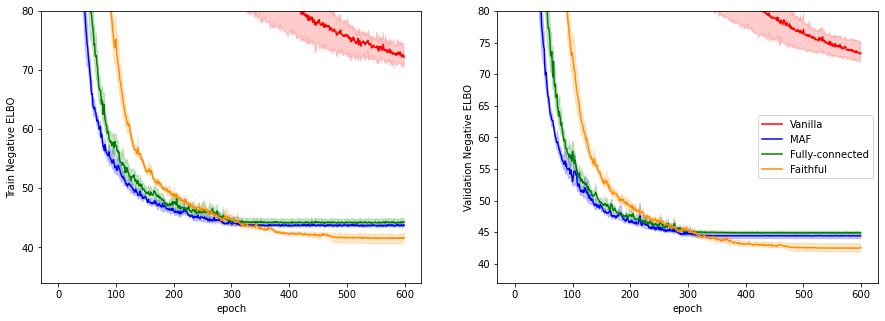

In [16]:
# (2x|G|) Plot loss
experiments = [
    'vanilla_vae/arth150-synth/[200]_[200]_2g',
    'maf_vae/arth150-synth/3_[200]_[200]_2g',
    'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]_2g',
    'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]_2g',
]
ax = plot_loss(experiments, _config={
    'num_runs':5,
    'iter':600,
    'ylims':[(34,80), (37,80)],
    'log_scale':False,
    'legend':['Vanilla', 'MAF', 'Fully-connected', 'Faithful'],
}, add_approx_marginal=False)

In [25]:
# Reconstruction error
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
    'vanilla_vae/arth150-synth/[200]_[200]_2g',
    'maf_vae/arth150-synth/3_[200]_[200]_2g',
    'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]_2g',
    'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]_2g',
    'siren_vae/arth150-synth/random_lipmish_6_[100]_[100]_2g'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'True', 'Random']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)


+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | True                    | Random                  |
+======================+=========================+=========================+=========================+=========================+=========================+
| Arth150              | 5.28 (0.31)             | 4.79 (0.01)             | 4.80 (0.01)             | 4.61 (0.02)             | 5.55 (1.11)             |
+----------------------+-------------------------+--------------------

In [ ]:
# Reconstruction error
experiments = [
    (Arth150(), load_dataset('arth150-synth', 5000, double=True)[2], [
    'iw_siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]_32k_2g',
    'iw_siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_32k_100N_all_2g',
    'iw_siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_32k_100N_selected_2g'
])
]
headings = ['FC', 'True (all)', 'True (select)']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)


+----------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                               |
+----------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | FC                      | True (all)              | True (select)           |
+======================+=========================+=========================+=========================+
| Arth150              | 5.05 (0.06)             | 4.63 (0.02)             | 4.65 (0.02)             |
+----------------------+-------------------------+-------------------------+-------------------------+
+----------------------------------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                                                   |
+----------------------+-------------------------+-----------------------

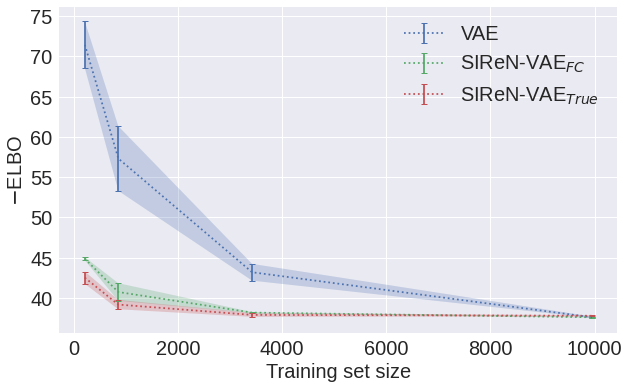

In [ ]:
# loss vs training set size
X = load_dataset('arth150-synth', 5000, double=True)[2]
plot_training_size_results(
    next(iter(X)).to(device),
    bn = Arth150(), 
    experiments = [
        (2, {
        'vanilla':'vanilla_vae/arth150-synth/[200]_[200]_2g',
        'fc':'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]_2g',
        'graphical':'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]_2g'}),
        (8, {
        'vanilla':'vanilla_vae/arth150-synth/[200]_[200]_8g',
        'fc':'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]_8g',
        'graphical':'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]_8g'}),
        (32, {
        'vanilla':'vanilla_vae/arth150-synth/[200]_[200]_32g',
        'fc':'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]_32g',
        'graphical':'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]_32g'}),
        (93, {
        'vanilla':'vanilla_vae/arth150-synth/[200]_[200]',
        'fc':'siren_vae/arth150-synth/fully-connected_lipmish_5_[200]_[200]',
        'graphical':'siren_vae/arth150-synth/faithful_lipmish_5_[200]_[200]'})
    ], jitter=10, device=device, save_to='arth150')

##### Mehra (Real)

In [26]:
# (2x|G|) Plot loss
experiments = [
    'vanilla_vae/mehra-real/[100]_[100]_2g',
    'maf_vae/mehra-real/3_[100]_[100]_2g',
    'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]_2g',
    'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_2g',
]
ax = plot_loss(experiments, _config={
    'num_runs':5,
    'iter':200,
    'ylims':[(9,11.), (9,11.)],
    'log_scale':False,
    'legend':['Vanilla', 'MAF', 'Fully-connected', 'Faithful'],
}, add_approx_marginal=False)

In [27]:
# Reconstruction Error
experiments = [
    (Mehra(), load_mehra(double=True)[2], [
    'vanilla_vae/mehra-real/[100]_[100]_2g',
    'maf_vae/mehra-real/3_[100]_[100]_2g',
    'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]_2g',
    'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_2g',
    'siren_vae/mehra-real/random_lipmish_5_[100]_[100]_2g'
])
]
headings = ['Vanilla', 'MAF', 'FC', 'True', 'Random']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                                                                                                   |
+----------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+
|    Belief Network    | Vanilla                 | MAF                     | FC                      | True                    | Random                  |
+======================+=========================+=========================+=========================+=========================+=========================+
| Mehra                | 2.44 (0.18)             | 2.31 (0.16)             | 2.48 (0.19)             | 2.55 (0.03)             | 2.56 (0.01)             |
+----------------------+-------------------------+--------------------

In [ ]:
# Reconstruction Error
experiments = [
    (Mehra(), load_mehra(double=True)[2], [
    'iw_siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]_32k_2g',
    'iw_siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32k_2g'
])
]
headings = ['FC', 'True']
print_metric(experiments, headings, 'recon_err', device)
print_metric(experiments, headings, 'nll', device)
print_metric(experiments, headings, 'inactive_units', device)

+--------------------------------------------------------------------------+
| RECONSTRUCTION ERROR                                                     |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | FC                      | True                    |
+======================+=========================+=========================+
| Mehra                | 2.55 (0.15)             | 2.39 (0.16)             |
+----------------------+-------------------------+-------------------------+
+--------------------------------------------------------------------------+
| NEGATIVE LOG LIKELIHOOD log p(x)                                         |
+----------------------+-------------------------+-------------------------+
|    Belief Network    | FC                      | True                    |
+======================+=========================+=========================+
| Mehra                | 10.45 (0.45)            | 10.34 (0.27)            |

In [ ]:
# loss vs training set size
X = load_mehra(double=True)[2]
plot_training_size_results(
    next(iter(X)).to(device),
    bn = Mehra(), 
    experiments = [
        (2, {
        'vanilla':'vanilla_vae/mehra-real/[100]_[100]_2g',
        'fc':'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]_2g',
        'graphical':'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_2g'}),
        (8, {
        'vanilla':'vanilla_vae/mehra-real/[100]_[100]_8g',
        'fc':'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]_8g',
        'graphical':'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_8g'}),
        (32, {
        'vanilla':'vanilla_vae/mehra-real/[100]_[100]_32g',
        'fc':'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]_32g',
        'graphical':'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32g'}),
        (64, {
        'vanilla':'vanilla_vae/mehra-real/[100]_[100]_64g',
        'fc':'siren_vae/mehra-real/fully-connected_lipmish_5_[100]_[100]_64g',
        'graphical':'siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_64g'})
    ], jitter=20, device=device, save_to='mehra')

---

<div class="alert alert-block alert-info">

## Investigation 4: Interpretability of Latents

</div>

### Arithmetic-Circuit 2

**Forward BN**
<img src="./experiment_logs/figures/arithmetic-circuit2.png" alt="arithmetic-circuit2 BN" style="width:300px;"/> 
**Inverse BN**
<img src="./experiment_logs/figures/arithmetic-circuit2-inv.png" alt="arithmetic-circuit2 BN Inverse" style="width:300px;"/>

#### Faithful

**Failure Case**

Posterior collapse has occurred for latent variable $z_0$ and $z_3$ below. This might explain poorer performance of this model. Furthermore, it is no longer straightforward to directly compare the inferred and true latents, since the model's latent space is effectively 2 dimensions smaller.

In [4]:
# Check for collapsed latent variables
path = './experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/1/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), 5)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))

A_z = ['(0): 0.00241', '(1): 2.09415', '(2): 7.74083', '(3): 0.00497', '(4): 4.28825']
#Inactive Units: 2


In [5]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='arithmetic-circuit2' run=1

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:15


In [6]:
# Mutual Information estimation --- TAKES A WHILE
! python ./siren_vae_MI.py './experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/1/' --estimate_between_true_and_inferred_latents --estimate_between_model_vars --estimate_between_true_vars 

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 1.937

Per dimension:
 0: (0: 0.001) (1: 0.263) (2: 0.030) (3: 0.000) (4: 0.012) 
 1: (0: 0.001) (1: 0.294) (2: 0.210) (3: 0.001) (4: 0.064) 
 2: (0: 0.000) (1: 0.041) (2: 0.167) (3: 0.000) (4: 0.072) 
 3: (0: 0.000) (1: 0.000) (2: 0.405) (3: 0.000) (4: 0.349) 
 4: (0: 0.001) (1: 0.009) (2: 1.256) (3: 0.001) (4: 1.364) 
-- Between x, z ~ p(x|z)p(z) --
MI(z, z) per dimension:
 0: (1: 0.001) (2: 0.001) (3: 0.001) (4: 0.001) 
 1: (2: 0.034) (3: 0.001) (4: 0.013) 
 2: (3: 0.000) (4: 1.060) 
 3: (4: 0.001) 
 4: 
MI(z, x) per dimension:
 0: (0: 0.001) (1: 0.001) (2: 0.001) (3: 0.000) (4: 0.000) (5: 0.001) (6: 0.001) (7: 0.001) (8: 0.001) (9: 0.001) 
 1: (0: 1.493) (1: 0.000) (2: 0.014) (3: 0.015) (4: 0.001) (5: 0.024) (6: 0.005) (7: 0.012) (8: 0.002) (9: 0.004) 
 2: (0: 0.026) (1: 0.001) (2: 1.067) (3: 0.267) (4: 0.001) (5: 1.502) (6: 0.170) (7: 1.104) (8: 0.041) (9: 0.146) 
 3: (0: 0.000) (1: 0.001) (2: 0.001) (3: 0.001) (4: 

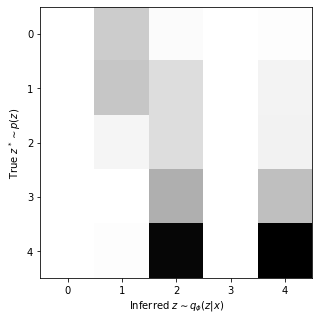

In [7]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/2', 'AC2_SIReN-VAE')

In [8]:
# MI between variables of the learned model
plot_MI_model('./experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/2', 'AC2_SIReN-VAE')

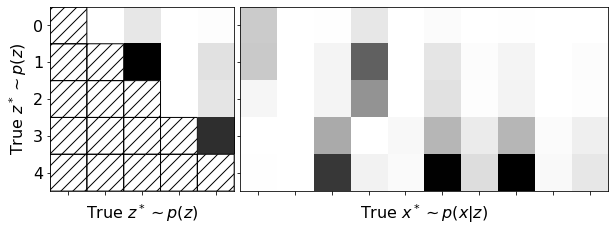

In [9]:
# MI between variables of the true data
plot_MI_true('./experiment_logs/siren_vae/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]/2', 'AC2')

**SIReN-IWAE + WU $_{selected}$ (32)**

In [10]:
# Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected/4/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(0)
x,_ = model.sample(5)
A = get_units_variances(model, x.to(device), 5)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))

A_z = ['(0): 0.40178', '(1): 0.45982', '(2): 1.63461', '(3): 16.96437', '(4): 10.77139']
#Inactive Units: 0


In [11]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='arithmetic-circuit2' run=4 iw=True  k=32 wu=True wu_N=100 dreg=False wu_all=False seed=2

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:16


In [12]:
# Mutual Information estimation --- TAKES AWHILE
! python ./siren_vae_MI.py './experiment_logs/iw_siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected/4/' --estimate_between_true_and_inferred_latents --estimate_between_model_vars

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 2.278

Per dimension:
 0: (0: 0.068) (1: 0.252) (2: 0.099) (3: 0.005) (4: 0.009) 
 1: (0: 0.108) (1: 0.277) (2: 0.716) (3: 0.039) (4: 0.062) 
 2: (0: 0.139) (1: 0.058) (2: 0.602) (3: 0.043) (4: 0.057) 
 3: (0: 0.001) (1: 0.000) (2: 0.000) (3: 0.419) (4: 0.384) 
 4: (0: 0.022) (1: 0.010) (2: 0.059) (3: 1.030) (4: 1.267) 
-- Between x, z ~ p(x|z)p(z) --
MI(z, z) per dimension:
 0: (1: 0.001) (2: 0.214) (3: -0.000) (4: 0.005) 
 1: (2: 0.122) (3: 0.001) (4: 0.002) 
 2: (3: 0.001) (4: 0.016) 
 3: (4: 1.421) 
 4: 
MI(z, x) per dimension:
 0: (0: 0.001) (1: 0.001) (2: 0.004) (3: 0.201) (4: 0.001) (5: 0.034) (6: 0.001) (7: 0.004) (8: 0.001) (9: 0.001) 
 1: (0: 1.436) (1: 0.001) (2: 0.001) (3: 0.117) (4: 0.000) (5: 0.016) (6: 0.001) (7: 0.002) (8: 0.000) (9: 0.001) 
 2: (0: 0.114) (1: 0.002) (2: 0.010) (3: 1.330) (4: 0.001) (5: 0.134) (6: 0.002) (7: 0.011) (8: 0.001) (9: 0.002) 
 3: (0: 0.001) (1: 0.000) (2: 1.008) (3: 0.001) (4:

In [13]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/iw_siren_vae_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected/5', 'AC2_SIReN-IWAE-WU', title='Arithmetic Circuit 2')

**SIReN-IWAE-DReG + WU $_{selected}$ (32)**

In [14]:
# Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae_dreg_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected/4/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(0)
x,_ = model.sample(5)
A = get_units_variances(model, x.to(device), 5)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))

A_z = ['(0): 3.25417', '(1): 1.35003', '(2): 0.21045', '(3): 62.49969', '(4): 4.67181']
#Inactive Units: 0


In [15]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='arithmetic-circuit2' run=4 iw=True  k=32 wu=True wu_N=100 dreg=True wu_all=False

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:15


In [16]:
# Mutual Information estimation --- TAKES AWHILE
! python ./siren_vae_MI.py './experiment_logs/iw_siren_vae_dreg_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected/4/' --estimate_between_true_and_inferred_latents --estimate_between_model_vars

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 2.227

Per dimension:
 0: (0: 0.259) (1: 0.241) (2: 0.099) (3: 0.007) (4: 0.009) 
 1: (0: 0.242) (1: 0.382) (2: 0.709) (3: 0.049) (4: 0.059) 
 2: (0: 0.042) (1: 0.497) (2: 0.593) (3: 0.037) (4: 0.061) 
 3: (0: 0.000) (1: 0.001) (2: 0.001) (3: 0.387) (4: 0.356) 
 4: (0: 0.006) (1: 0.058) (2: 0.065) (3: 1.035) (4: 1.229) 
-- Between x, z ~ p(x|z)p(z) --
MI(z, z) per dimension:
 0: (1: 0.000) (2: 0.060) (3: 0.000) (4: 0.001) 
 1: (2: 1.023) (3: 0.001) (4: 0.005) 
 2: (3: 0.001) (4: 0.006) 
 3: (4: 1.380) 
 4: 
MI(z, x) per dimension:
 0: (0: 1.216) (1: 0.001) (2: 0.002) (3: 0.055) (4: 0.000) (5: 0.009) (6: 0.001) (7: 0.001) (8: 0.001) (9: 0.000) 
 1: (0: 0.008) (1: 0.002) (2: 0.003) (3: 0.815) (4: 0.000) (5: 0.094) (6: 0.001) (7: 0.002) (8: 0.001) (9: 0.001) 
 2: (0: 0.080) (1: 0.002) (2: 0.003) (3: 1.283) (4: 0.002) (5: 0.118) (6: 0.001) (7: 0.002) (8: 0.000) (9: 0.002) 
 3: (0: 0.001) (1: 0.001) (2: 0.994) (3: 0.001) (4: 

In [17]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/iw_siren_vae_dreg_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected/4', 'AC2_SIReN-IWAE-DReG-WU')

In [18]:
plot_MI_model('./experiment_logs/iw_siren_vae_dreg_wu/arithmetic-circuit2/faithful_lipmish_5_[100]_[100]_32k_100N_selected/4', 'AC2_SIReN-IWAE-DReG-WU')

### EColi70 Alternative (Synthetic)

![ecoli_bn](./experiment_logs/figures/ecoli_bn.png)

**SIReN-IWAE**

In [19]:
# Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k/3/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), num_latent=15)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))

A_z = ['(0): 1.32075', '(1): 1.42223', '(2): 1.96322', '(3): 1.43212', '(4): 2.39267', '(5): 7.97330', '(6): 2.38144', '(7): 2.04763', '(8): 7.37066', '(9): 4.88564', '(10): 3.44328', '(11): 6.66457', '(12): 4.36706', '(13): 7.52759', '(14): 14.08115']
#Inactive Units: 0


In [20]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='ecoli70-alt' iw=True k=8 run=3 

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:16


In [21]:
# Mutual Information estimation --- TAKES AWHILE
! python ./siren_vae_MI.py './experiment_logs/iw_siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k/3/' --estimate_between_true_and_inferred_latents --estimate_between_model_vars

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 3.086

Per dimension:
 0: (0: 0.087) (1: 0.220) (2: 0.338) (3: 0.000) (4: 0.001) (5: 0.379) (6: 0.059) (7: 0.107) (8: 0.582) (9: 0.019) (10: 0.001) (11: 0.092) (12: 0.001) (13: 0.612) (14: 0.420) 
 1: (0: 0.067) (1: 0.301) (2: 0.391) (3: 0.001) (4: 0.001) (5: 0.689) (6: 0.013) (7: 0.102) (8: 0.449) (9: 0.016) (10: 0.001) (11: 0.020) (12: 0.001) (13: 0.536) (14: 0.868) 
 2: (0: 0.063) (1: 0.257) (2: 0.574) (3: 0.001) (4: 0.000) (5: 0.317) (6: 0.001) (7: 0.194) (8: 0.379) (9: 0.014) (10: 0.004) (11: 0.000) (12: 0.000) (13: 0.390) (14: 0.367) 
 3: (0: 0.001) (1: 0.001) (2: 0.001) (3: 0.518) (4: 0.028) (5: 0.002) (6: 0.002) (7: 0.001) (8: 0.001) (9: 0.003) (10: 0.000) (11: 0.001) (12: 0.021) (13: 0.001) (14: 0.001) 
 4: (0: 0.002) (1: 0.001) (2: 0.001) (3: 0.027) (4: 0.749) (5: 0.012) (6: 0.000) (7: 0.000) (8: 0.001) (9: 0.017) (10: 0.001) (11: 0.001) (12: 0.456) (13: 0.001) (14: 0.012) 
 5: (0: 0.059) (1: 0.256) (2: 0.293) 

 13: (0: 0.659) (1: 0.056) (2: 0.005) (3: 0.399) (4: 0.066) (5: 0.141) (6: 0.061) (7: 0.059) (8: 0.428) (9: 0.025) (10: 0.001) (11: 0.043) (12: 0.040) (13: 0.001) (14: 0.334) (15: 0.001) (16: 0.001) (17: 0.001) (18: 0.062) (19: 0.223) (20: 0.009) (21: 0.120) (22: 0.350) (23: 0.001) (24: 0.051) (25: 0.002) (26: 0.061) (27: 0.054) (28: 0.002) 
 14: (0: 0.323) (1: 0.008) (2: 0.003) (3: 0.882) (4: 0.040) (5: 0.202) (6: 0.009) (7: 0.007) (8: 1.126) (9: 0.004) (10: 0.001) (11: 0.009) (12: 0.020) (13: 0.019) (14: 0.679) (15: 0.001) (16: 0.015) (17: 0.019) (18: 0.009) (19: 0.200) (20: 0.022) (21: 0.039) (22: 0.971) (23: 0.008) (24: 0.009) (25: 0.001) (26: 0.045) (27: 0.007) (28: 0.002) 


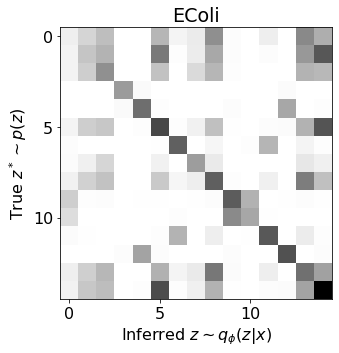

In [22]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/iw_siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k/3/', 'ECOLI_SIReN-IWAE', step_size=5, title='EColi')

In [23]:
# MI between variables of the learned model
plot_MI_model('./experiment_logs/iw_siren_vae/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k/3/', 'ECOLI_SIReN-IWAE', hatch='///', step_size=5)

**SIReN-IWAE + WU $_{select}$ (8 IW samples)**

In [24]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='ecoli70-alt' iw=True k=8 wu=True wu_N=100 run=1 

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:15


In [25]:
# Mutual Information estimation --- TAKES AWHILE
! python ./siren_vae_MI.py './experiment_logs/iw_siren_vae_wu/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k_100N_selected/1/' --estimate_between_true_and_inferred_latents --estimate_between_model_vars --estimate_between_true_vars

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 3.024

Per dimension:
 0: (0: 0.374) (1: 0.443) (2: 0.345) (3: 0.001) (4: 0.001) (5: 0.354) (6: 0.055) (7: 0.118) (8: 0.589) (9: 0.024) (10: 0.000) (11: 0.096) (12: 0.001) (13: 0.597) (14: 0.420) 
 1: (0: 0.316) (1: 0.781) (2: 0.371) (3: 0.001) (4: 0.001) (5: 0.622) (6: 0.012) (7: 0.109) (8: 0.472) (9: 0.020) (10: 0.001) (11: 0.022) (12: 0.001) (13: 0.498) (14: 0.779) 
 2: (0: 0.242) (1: 0.398) (2: 0.560) (3: 0.000) (4: 0.000) (5: 0.312) (6: 0.001) (7: 0.196) (8: 0.376) (9: 0.017) (10: 0.002) (11: 0.001) (12: 0.001) (13: 0.377) (14: 0.366) 
 3: (0: 0.001) (1: 0.000) (2: 0.000) (3: 0.540) (4: 0.031) (5: 0.002) (6: 0.002) (7: 0.001) (8: 0.001) (9: 0.002) (10: 0.000) (11: 0.001) (12: 0.024) (13: 0.001) (14: 0.003) 
 4: (0: 0.000) (1: 0.001) (2: -0.000) (3: 0.029) (4: 0.777) (5: 0.013) (6: 0.001) (7: 0.000) (8: 0.000) (9: 0.017) (10: 0.001) (11: 0.001) (12: 0.460) (13: 0.000) (14: 0.013) 
 5: (0: 0.241) (1: 0.658) (2: 0.269)

 13: (0: 0.692) (1: 0.057) (2: 0.004) (3: 0.365) (4: 0.057) (5: 0.118) (6: 0.062) (7: 0.069) (8: 0.407) (9: 0.027) (10: 0.000) (11: 0.048) (12: 0.033) (13: 0.000) (14: 0.302) (15: 0.000) (16: 0.001) (17: -0.000) (18: 0.068) (19: 0.203) (20: 0.009) (21: 0.117) (22: 0.345) (23: 0.000) (24: 0.051) (25: 0.000) (26: 0.059) (27: 0.064) (28: 0.001) 
 14: (0: 0.323) (1: 0.011) (2: 0.002) (3: 0.881) (4: 0.048) (5: 0.200) (6: 0.009) (7: 0.009) (8: 1.079) (9: 0.004) (10: 0.001) (11: 0.006) (12: 0.016) (13: 0.018) (14: 0.675) (15: 0.001) (16: 0.018) (17: 0.016) (18: 0.011) (19: 0.208) (20: 0.020) (21: 0.041) (22: 0.942) (23: 0.011) (24: 0.005) (25: 0.001) (26: 0.046) (27: 0.007) (28: 0.001) 
-- Between x, z ~ p*(x|z)p*(z) --
MI(z, z) per dimension:
 0: (1: 0.550) (2: 0.537) (3: 0.001) (4: 0.000) (5: 0.386) (6: 0.055) (7: 0.108) (8: 0.603) (9: 0.022) (10: 0.001) (11: 0.105) (12: 0.001) (13: 1.456) (14: 0.450) 
 1: (2: 0.484) (3: 0.001) (4: 0.000) (5: 0.763) (6: 0.013) (7: 0.108) (8: 0.418) (9: 0.01

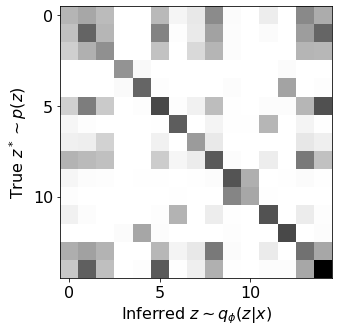

In [26]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/iw_siren_vae_wu/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k_100N_selected/1/', 'ECOLI_SIReN-IWAE-WU', step_size=5)

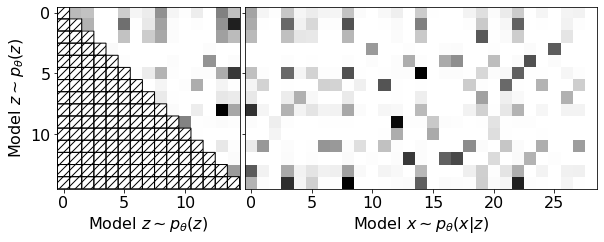

In [27]:
# MI between variables of the learned model
plot_MI_model('./experiment_logs/iw_siren_vae_wu/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k_100N_selected/1/', 'ECOLI_SIReN-IWAE-WU', hatch='///', step_size=5)

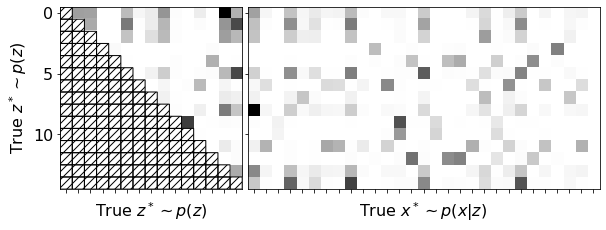

In [28]:
plot_MI_true('./experiment_logs/iw_siren_vae_wu/ecoli70-alt/faithful_lipmish_5_[100]_[100]_8k_100N_selected/1/', 'ECOLI', hatch='///', step_size=5)

### Arth150 (Synthetic)

<img src="./experiment_logs/figures/arth150_bn.png" alt="Arth150 BN" style="width:700px;"/>

**IW-SIReN-VAE + WU $_{select}$ (8 IW samples)**

In [29]:
# Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected/3/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), num_latent=40)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))

A_z = ['(0): 0.00294', '(1): 0.73365', '(2): 0.03323', '(3): 0.09767', '(4): 0.06034', '(5): 0.01196', '(6): 6.40404', '(7): 0.00642', '(8): 0.70209', '(9): 0.12979', '(10): 0.02566', '(11): 0.02734', '(12): 0.29747', '(13): 0.44862', '(14): 0.03238', '(15): 0.37877', '(16): 0.04224', '(17): 0.59050', '(18): 0.74999', '(19): 0.45370', '(20): 0.21017', '(21): 0.07300', '(22): 0.04586', '(23): 0.01155', '(24): 0.02575', '(25): 0.00991', '(26): 0.01435', '(27): 0.03954', '(28): 0.00410', '(29): 0.09063', '(30): 0.52922', '(31): 0.15647', '(32): 0.01566', '(33): 2.21016', '(34): 0.13450', '(35): 0.33444', '(36): 0.10578', '(37): 0.10881', '(38): 0.52237', '(39): 0.02741']
#Inactive Units: 4


In [30]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='arth150-synth' decoder_hidden_dims='[200]' flow_hidden_dims='[200]' iw=True k=8 wu=True wu_N=75 wu_all=False run=3 

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:16


In [31]:
# Mutual Information estimation --- TAKES AWHILE
! python ./siren_vae_MI.py './experiment_logs/iw_siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected/3/' --estimate_between_true_and_inferred_latents

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 0.291

Per dimension:
 0: (0: 0.000) (1: 0.000) (2: 0.000) (3: 0.000) (4: -0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: -0.000) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: 0.000) (16: -0.001) (17: 0.000) (18: 0.000) (19: 0.000) (20: 0.001) (21: -0.002) (22: -0.000) (23: 0.000) (24: -0.000) (25: 0.000) (26: -0.000) (27: -0.000) (28: 0.000) (29: 0.000) (30: 0.000) (31: 0.006) (32: -0.000) (33: 0.000) (34: -0.000) (35: 0.000) (36: -0.001) (37: 0.018) (38: 0.017) (39: 0.000) 
 1: (0: 0.000) (1: 0.021) (2: -0.000) (3: -0.000) (4: 0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: 0.000) (9: -0.000) (10: 0.000) (11: 0.002) (12: 0.019) (13: 0.028) (14: 0.001) (15: 0.131) (16: -0.001) (17: 0.000) (18: 0.030) (19: 0.021) (20: 0.000) (21: -0.000) (22: -0.000) (23: 0.000) (24: -0.001) (25: 0.000) (26: 0.000) (27: -0.003) (28: 0.000) (29: 0.010) (30: 0.033) (31: 0.000) (32: 0.000) (33: 0.099) (34: 0.006) (35

 17: (0: -0.000) (1: 0.000) (2: -0.000) (3: 0.003) (4: -0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: 0.015) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: 0.000) (16: 0.000) (17: 0.013) (18: 0.000) (19: 0.000) (20: 0.000) (21: -0.000) (22: -0.000) (23: 0.000) (24: 0.000) (25: 0.000) (26: -0.000) (27: -0.001) (28: 0.000) (29: 0.000) (30: 0.000) (31: -0.000) (32: -0.001) (33: 0.000) (34: -0.001) (35: 0.065) (36: -0.000) (37: 0.000) (38: -0.000) (39: 0.000) 
 18: (0: 0.000) (1: 0.004) (2: -0.001) (3: 0.000) (4: -0.000) (5: 0.000) (6: -0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: 0.000) (11: 0.001) (12: 0.013) (13: 0.005) (14: 0.001) (15: 0.008) (16: -0.000) (17: 0.000) (18: 0.006) (19: 0.004) (20: 0.000) (21: -0.000) (22: -0.001) (23: -0.000) (24: -0.001) (25: 0.000) (26: -0.000) (27: -0.010) (28: 0.000) (29: 0.001) (30: 0.009) (31: 0.001) (32: 0.000) (33: 0.015) (34: 0.010) (35: -0.000) (36: -0.000) (37: 0.002) (38: 0.001) (39: -0.000) 
 19: (0: 0.000) (1: 0

 34: (0: 0.000) (1: 0.005) (2: -0.000) (3: 0.000) (4: -0.001) (5: 0.000) (6: 0.000) (7: 0.000) (8: 0.000) (9: 0.000) (10: 0.000) (11: 0.001) (12: 0.075) (13: 0.009) (14: 0.005) (15: 0.003) (16: -0.001) (17: -0.000) (18: 0.012) (19: 0.001) (20: 0.000) (21: -0.001) (22: -0.000) (23: 0.001) (24: -0.001) (25: 0.000) (26: -0.001) (27: 0.000) (28: 0.000) (29: 0.001) (30: 0.001) (31: -0.000) (32: 0.000) (33: 0.005) (34: 0.031) (35: -0.000) (36: 0.000) (37: 0.000) (38: 0.000) (39: 0.000) 
 35: (0: 0.000) (1: 0.000) (2: 0.000) (3: 0.004) (4: -0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: 0.021) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: 0.000) (16: -0.005) (17: 0.015) (18: 0.000) (19: 0.000) (20: 0.000) (21: -0.002) (22: 0.000) (23: 0.000) (24: -0.000) (25: 0.000) (26: -0.001) (27: -0.000) (28: 0.000) (29: 0.001) (30: 0.000) (31: -0.000) (32: 0.000) (33: 0.000) (34: -0.001) (35: 0.133) (36: -0.000) (37: 0.000) (38: 0.000) (39: 0.000) 
 36: (0: 0.000) (1: -0.000) 

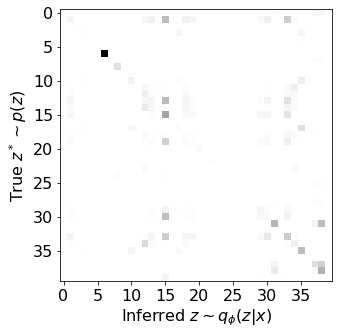

In [32]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/iw_siren_vae_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected/3/', 'ARTH_SIReN-IWAE-WU', step_size=5)

**IW-SIReN-VAE-DReG + WU $_{select}$ (8 IW samples)**

In [33]:
# Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae_dreg_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected/3/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(1)
x,_ = model.sample(100)
A = get_units_variances(model, x.double().to(device), num_latent=40)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))

A_z = ['(0): 0.58186', '(1): 1.16873', '(2): 0.02432', '(3): 0.18027', '(4): 0.05627', '(5): 0.02804', '(6): 10.12493', '(7): 0.00430', '(8): 0.45092', '(9): 0.11492', '(10): 0.06262', '(11): 0.12384', '(12): 0.16511', '(13): 0.42885', '(14): 0.97872', '(15): 0.36321', '(16): 0.02159', '(17): 0.38123', '(18): 0.30918', '(19): 2.52643', '(20): 0.34208', '(21): 0.22104', '(22): 0.02251', '(23): 0.01362', '(24): 0.02160', '(25): 0.35327', '(26): 0.16159', '(27): 0.05107', '(28): 0.00326', '(29): 0.08439', '(30): 1.08694', '(31): 0.67492', '(32): 0.02726', '(33): 0.58370', '(34): 0.19278', '(35): 0.41787', '(36): 0.09888', '(37): 0.11759', '(38): 0.49624', '(39): 0.69867']
#Inactive Units: 2


In [49]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='arth150-synth' decoder_hidden_dims='[200]' flow_hidden_dims='[200]' iw=True k=8 wu=True wu_N=75 wu_all=False dreg=True run=3

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:33


In [50]:
# Mutual Information estimation --- TAKES AWHILE
! python ./siren_vae_MI.py './experiment_logs/iw_siren_vae_dreg_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected/3/' --estimate_between_true_and_inferred_latents --estimate_between_model_vars --estimate_between_true_vars

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 0.319

Per dimension:
 0: (0: 0.012) (1: 0.000) (2: -0.000) (3: 0.000) (4: -0.001) (5: 0.000) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: -0.000) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: 0.000) (16: -0.000) (17: 0.000) (18: 0.000) (19: 0.000) (20: 0.000) (21: -0.004) (22: -0.000) (23: 0.000) (24: 0.000) (25: 0.014) (26: -0.000) (27: -0.001) (28: 0.000) (29: 0.000) (30: 0.000) (31: -0.004) (32: -0.000) (33: 0.000) (34: -0.000) (35: 0.000) (36: -0.000) (37: 0.019) (38: 0.021) (39: 0.000) 
 1: (0: -0.000) (1: 0.089) (2: 0.000) (3: 0.000) (4: -0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: 0.000) (9: 0.000) (10: -0.000) (11: 0.005) (12: 0.025) (13: 0.086) (14: 0.022) (15: 0.115) (16: -0.000) (17: 0.000) (18: 0.024) (19: 0.050) (20: 0.000) (21: -0.003) (22: 0.000) (23: 0.000) (24: -0.000) (25: 0.000) (26: -0.031) (27: -0.001) (28: 0.000) (29: 0.006) (30: 0.048) (31: 0.000) (32: 0.000) (33: 0.052) (34: 0.006) (3

 17: (0: 0.000) (1: 0.000) (2: 0.000) (3: 0.006) (4: -0.000) (5: 0.001) (6: -0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: 0.018) (11: -0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: 0.000) (16: -0.000) (17: 0.011) (18: 0.000) (19: 0.000) (20: 0.000) (21: -0.000) (22: 0.000) (23: 0.000) (24: -0.000) (25: 0.000) (26: -0.000) (27: -0.000) (28: 0.000) (29: -0.000) (30: 0.000) (31: -0.000) (32: -0.000) (33: 0.000) (34: -0.003) (35: 0.062) (36: 0.000) (37: -0.000) (38: -0.000) (39: 0.000) 
 18: (0: -0.001) (1: 0.023) (2: 0.000) (3: 0.000) (4: 0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: -0.000) (11: 0.002) (12: 0.016) (13: 0.028) (14: 0.015) (15: 0.006) (16: -0.000) (17: 0.000) (18: 0.018) (19: 0.014) (20: 0.000) (21: -0.000) (22: -0.000) (23: 0.000) (24: -0.000) (25: 0.000) (26: -0.000) (27: -0.001) (28: 0.000) (29: 0.000) (30: 0.005) (31: -0.001) (32: -0.001) (33: 0.019) (34: 0.011) (35: -0.000) (36: -0.000) (37: 0.002) (38: -0.001) (39: 0.004) 
 19: (0: 0.000) (1:

 34: (0: 0.000) (1: 0.019) (2: 0.000) (3: -0.000) (4: -0.001) (5: 0.000) (6: -0.000) (7: 0.000) (8: 0.000) (9: 0.000) (10: -0.000) (11: 0.007) (12: 0.089) (13: 0.086) (14: 0.048) (15: 0.001) (16: -0.000) (17: 0.000) (18: 0.044) (19: -0.001) (20: 0.000) (21: -0.000) (22: -0.000) (23: 0.000) (24: -0.000) (25: 0.000) (26: -0.002) (27: -0.003) (28: 0.000) (29: -0.000) (30: -0.000) (31: -0.000) (32: -0.000) (33: 0.013) (34: 0.030) (35: -0.000) (36: 0.000) (37: 0.000) (38: 0.000) (39: 0.000) 
 35: (0: 0.000) (1: 0.000) (2: 0.000) (3: 0.008) (4: -0.001) (5: 0.001) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: 0.023) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: 0.000) (16: -0.000) (17: 0.012) (18: 0.000) (19: -0.000) (20: 0.000) (21: -0.000) (22: -0.001) (23: 0.000) (24: -0.000) (25: 0.000) (26: -0.003) (27: 0.000) (28: 0.000) (29: 0.001) (30: 0.000) (31: -0.000) (32: -0.001) (33: -0.000) (34: 0.000) (35: 0.124) (36: -0.000) (37: -0.000) (38: 0.000) (39: 0.000) 
 36: (0: 0.000) (1:

 13: (14: 0.442) (15: 0.003) (16: -0.000) (17: -0.000) (18: 0.177) (19: 0.056) (20: 0.000) (21: -0.004) (22: -0.000) (23: 0.001) (24: -0.000) (25: 0.001) (26: -0.001) (27: -0.003) (28: 0.001) (29: 0.000) (30: 0.009) (31: -0.000) (32: -0.002) (33: 0.050) (34: 0.014) (35: -0.000) (36: 0.000) (37: -0.000) (38: 0.000) (39: 0.018) 
 14: (15: 0.000) (16: 0.000) (17: -0.000) (18: 0.184) (19: 0.000) (20: 0.000) (21: -0.003) (22: -0.000) (23: 0.001) (24: -0.000) (25: 0.001) (26: -0.003) (27: -0.005) (28: 0.000) (29: -0.001) (30: 0.000) (31: -0.000) (32: -0.001) (33: 0.041) (34: 0.035) (35: -0.001) (36: -0.003) (37: 0.000) (38: -0.000) (39: 0.000) 
 15: (16: -0.001) (17: 0.000) (18: -0.000) (19: 0.019) (20: -0.000) (21: -0.001) (22: -0.000) (23: 0.000) (24: -0.000) (25: -0.000) (26: -0.004) (27: -0.001) (28: 0.000) (29: 0.026) (30: 0.032) (31: -0.001) (32: -0.000) (33: 0.015) (34: -0.001) (35: 0.000) (36: 0.000) (37: 0.000) (38: 0.000) (39: 0.001) 
 16: (17: -0.000) (18: -0.000) (19: -0.001) (20

 5: (0: 0.000) (1: 0.000) (2: 0.000) (3: -0.000) (4: 0.000) (5: -0.000) (6: -0.000) (7: 0.001) (8: 0.000) (9: 0.000) (10: -0.000) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.006) (15: 0.000) (16: 0.000) (17: -0.000) (18: 0.000) (19: 0.000) (20: 0.000) (21: 0.000) (22: 0.000) (23: 0.000) (24: 0.000) (25: 0.000) (26: 0.000) (27: 0.000) (28: 0.000) (29: -0.000) (30: 0.000) (31: 0.000) (32: 0.000) (33: 0.000) (34: 0.000) (35: 0.000) (36: 0.000) (37: 0.000) (38: 0.000) (39: 0.000) (40: 0.000) (41: 0.000) (42: 0.002) (43: 0.000) (44: 0.000) (45: -0.000) (46: 0.000) (47: 0.000) (48: 0.000) (49: 0.000) (50: -0.001) (51: 0.001) (52: 0.000) (53: 0.000) (54: 0.000) (55: 0.000) (56: 0.000) (57: 0.000) (58: 0.000) (59: 0.000) (60: 0.000) (61: -0.000) (62: 0.000) (63: 0.000) (64: 0.001) (65: -0.000) (66: 0.000) 
 6: (0: -0.000) (1: 0.000) (2: 0.000) (3: -0.003) (4: -0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: 0.000) (11: 0.000) (12: 0.000) (13: 0.000) (14: -0.000) (15: 0.000) 

 16: (0: -0.000) (1: -0.000) (2: -0.001) (3: -0.000) (4: -0.001) (5: -0.000) (6: -0.000) (7: 0.000) (8: 0.011) (9: -0.001) (10: -0.000) (11: -0.000) (12: 0.000) (13: -0.000) (14: 0.000) (15: -0.000) (16: -0.000) (17: -0.000) (18: -0.000) (19: -0.000) (20: -0.000) (21: 0.000) (22: -0.000) (23: -0.000) (24: -0.000) (25: -0.000) (26: 0.000) (27: -0.000) (28: -0.001) (29: -0.000) (30: -0.001) (31: 0.000) (32: -0.000) (33: -0.000) (34: 0.000) (35: -0.000) (36: -0.000) (37: -0.000) (38: -0.000) (39: -0.000) (40: -0.001) (41: -0.000) (42: -0.000) (43: -0.000) (44: 0.000) (45: 0.030) (46: -0.000) (47: 0.000) (48: -0.000) (49: -0.000) (50: -0.000) (51: -0.001) (52: -0.001) (53: 0.000) (54: -0.000) (55: 0.000) (56: -0.000) (57: -0.001) (58: -0.000) (59: -0.000) (60: -0.001) (61: 0.000) (62: -0.000) (63: -0.000) (64: 0.000) (65: -0.000) (66: -0.000) 
 17: (0: 0.000) (1: 0.002) (2: 0.000) (3: -0.000) (4: 0.000) (5: -0.001) (6: 0.000) (7: 0.000) (8: 0.000) (9: -0.000) (10: 0.000) (11: -0.001) (12: 

 26: (0: -0.001) (1: -0.002) (2: -0.000) (3: -0.010) (4: -0.005) (5: -0.005) (6: -0.001) (7: -0.003) (8: -0.003) (9: -0.003) (10: -0.003) (11: -0.000) (12: -0.006) (13: -0.029) (14: -0.001) (15: -0.002) (16: -0.001) (17: -0.000) (18: -0.005) (19: -0.000) (20: -0.004) (21: -0.000) (22: -0.000) (23: -0.008) (24: -0.000) (25: -0.001) (26: -0.002) (27: -0.002) (28: -0.003) (29: -0.002) (30: -0.009) (31: -0.000) (32: -0.005) (33: -0.002) (34: -0.009) (35: -0.000) (36: -0.001) (37: -0.003) (38: -0.001) (39: -0.001) (40: -0.002) (41: -0.002) (42: -0.004) (43: -0.001) (44: 0.000) (45: -0.003) (46: -0.000) (47: 0.000) (48: -0.003) (49: -0.004) (50: -0.003) (51: -0.001) (52: -0.003) (53: -0.001) (54: -0.000) (55: -0.000) (56: -0.002) (57: -0.011) (58: -0.002) (59: 0.000) (60: -0.013) (61: -0.006) (62: -0.003) (63: -0.006) (64: -0.000) (65: -0.000) (66: -0.000) 
 27: (0: -0.001) (1: -0.001) (2: -0.001) (3: 0.000) (4: 0.000) (5: -0.000) (6: -0.007) (7: -0.001) (8: 0.000) (9: -0.003) (10: -0.000) (

 36: (0: -0.000) (1: -0.000) (2: -0.000) (3: -0.001) (4: 0.000) (5: 0.000) (6: 0.000) (7: -0.000) (8: 0.000) (9: -0.000) (10: 0.000) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: -0.000) (16: -0.000) (17: -0.000) (18: 0.000) (19: -0.000) (20: 0.000) (21: 0.000) (22: -0.000) (23: -0.000) (24: 0.000) (25: -0.000) (26: -0.000) (27: -0.000) (28: -0.000) (29: 0.000) (30: 0.000) (31: -0.000) (32: -0.000) (33: -0.000) (34: 0.000) (35: -0.000) (36: -0.000) (37: 0.000) (38: 0.000) (39: -0.000) (40: -0.000) (41: 0.000) (42: -0.000) (43: 0.000) (44: -0.000) (45: -0.000) (46: -0.000) (47: 0.000) (48: 0.000) (49: 0.000) (50: -0.000) (51: -0.000) (52: -0.000) (53: -0.000) (54: 0.000) (55: 0.000) (56: -0.000) (57: -0.000) (58: 0.000) (59: -0.001) (60: 0.000) (61: -0.000) (62: -0.000) (63: 0.000) (64: -0.001) (65: 0.000) (66: 0.156) 
 37: (0: -0.000) (1: -0.000) (2: 0.000) (3: 0.474) (4: -0.000) (5: -0.000) (6: -0.000) (7: 0.000) (8: -0.001) (9: 0.004) (10: -0.000) (11: -0.000) (12: 0.011) (13:

 12: (13: 0.070) (14: 0.418) (15: 0.000) (16: 0.000) (17: 0.000) (18: 0.080) (19: 0.011) (20: 0.000) (21: 0.000) (22: 0.000) (23: 0.034) (24: 0.000) (25: 0.000) (26: 0.000) (27: 0.000) (28: 0.000) (29: 0.000) (30: -0.001) (31: 0.000) (32: 0.000) (33: 0.012) (34: 0.073) (35: 0.000) (36: 0.000) (37: 0.000) (38: 0.000) (39: 0.004) 
 13: (14: 0.088) (15: 0.132) (16: 0.000) (17: 0.000) (18: 0.068) (19: 0.214) (20: 0.000) (21: -0.000) (22: 0.000) (23: 0.002) (24: 0.003) (25: 0.000) (26: -0.000) (27: 0.000) (28: 0.002) (29: 0.019) (30: 0.089) (31: 0.000) (32: 0.000) (33: 0.091) (34: 0.023) (35: 0.000) (36: 0.000) (37: 0.000) (38: 0.000) (39: 0.012) 
 14: (15: -0.000) (16: -0.000) (17: 0.000) (18: 0.070) (19: 0.017) (20: -0.000) (21: 0.000) (22: 0.000) (23: 0.035) (24: 0.000) (25: -0.000) (26: 0.000) (27: 0.000) (28: 0.000) (29: 0.000) (30: 0.000) (31: 0.000) (32: 0.000) (33: 0.013) (34: 0.065) (35: 0.000) (36: 0.000) (37: 0.000) (38: 0.000) (39: 0.003) 
 15: (16: 0.000) (17: 0.000) (18: 0.000

 5: (0: 0.000) (1: 0.000) (2: 0.000) (3: 0.000) (4: 0.000) (5: -0.000) (6: -0.000) (7: 0.000) (8: 0.000) (9: -0.000) (10: -0.001) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.005) (15: 0.000) (16: 0.000) (17: 0.000) (18: 0.000) (19: -0.000) (20: -0.000) (21: 0.000) (22: 0.000) (23: 0.000) (24: 0.000) (25: 0.000) (26: 0.000) (27: 0.001) (28: 0.000) (29: 0.001) (30: -0.000) (31: 0.000) (32: 0.000) (33: 0.000) (34: 0.000) (35: -0.000) (36: 0.000) (37: 0.000) (38: 0.000) (39: 0.000) (40: -0.000) (41: 0.000) (42: 0.003) (43: 0.000) (44: -0.000) (45: 0.000) (46: 0.000) (47: 0.000) (48: 0.000) (49: 0.000) (50: -0.000) (51: 0.001) (52: -0.000) (53: 0.000) (54: 0.000) (55: 0.000) (56: 0.000) (57: 0.000) (58: 0.000) (59: 0.000) (60: 0.000) (61: 0.000) (62: 0.000) (63: 0.000) (64: 0.000) (65: -0.000) (66: -0.000) 
 6: (0: 0.000) (1: 0.000) (2: 0.000) (3: 0.000) (4: 0.000) (5: 0.000) (6: -0.000) (7: 0.000) (8: -0.000) (9: -0.000) (10: 0.000) (11: 0.000) (12: 0.000) (13: 0.000) (14: -0.000) (15: 0.00

 16: (0: 0.000) (1: -0.000) (2: 0.000) (3: 0.000) (4: 0.000) (5: -0.000) (6: -0.000) (7: 0.000) (8: 0.001) (9: -0.000) (10: 0.000) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: -0.000) (16: 0.000) (17: 0.000) (18: 0.001) (19: 0.000) (20: 0.000) (21: -0.000) (22: 0.000) (23: 0.000) (24: -0.000) (25: -0.000) (26: -0.000) (27: -0.000) (28: 0.000) (29: -0.000) (30: -0.000) (31: 0.000) (32: 0.000) (33: -0.000) (34: 0.000) (35: 0.000) (36: -0.000) (37: 0.000) (38: 0.000) (39: -0.000) (40: 0.000) (41: 0.000) (42: -0.000) (43: 0.000) (44: -0.000) (45: 0.029) (46: 0.000) (47: 0.000) (48: 0.000) (49: -0.000) (50: 0.000) (51: -0.000) (52: 0.000) (53: 0.000) (54: -0.001) (55: -0.000) (56: 0.000) (57: 0.000) (58: 0.000) (59: -0.000) (60: 0.000) (61: 0.000) (62: -0.000) (63: 0.000) (64: 0.000) (65: 0.000) (66: -0.000) 
 17: (0: -0.000) (1: 0.015) (2: 0.000) (3: 0.000) (4: 0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: 0.000) (9: 0.000) (10: 0.000) (11: -0.000) (12: 0.000) (13: 0.000) (14: 0.000)

 27: (0: 0.000) (1: 0.000) (2: 0.000) (3: 0.000) (4: 0.002) (5: 0.000) (6: -0.000) (7: 0.000) (8: 0.000) (9: 0.000) (10: 0.001) (11: 0.000) (12: 0.000) (13: 0.000) (14: 0.000) (15: 0.000) (16: 0.000) (17: 0.000) (18: 0.002) (19: 0.000) (20: 0.000) (21: 0.000) (22: 0.000) (23: 0.000) (24: -0.000) (25: 0.000) (26: -0.000) (27: 0.000) (28: 0.000) (29: 0.000) (30: -0.000) (31: 0.000) (32: 0.000) (33: 0.000) (34: 0.000) (35: -0.000) (36: 0.000) (37: 0.000) (38: 0.002) (39: 0.000) (40: -0.000) (41: 0.000) (42: -0.000) (43: -0.000) (44: 0.002) (45: 0.006) (46: 0.000) (47: 0.000) (48: 0.002) (49: 0.000) (50: 0.001) (51: 0.001) (52: -0.000) (53: 0.001) (54: -0.000) (55: 0.000) (56: 0.001) (57: 0.000) (58: 0.000) (59: 0.000) (60: 0.000) (61: 0.000) (62: 0.000) (63: 0.000) (64: 0.000) (65: -0.000) (66: 0.000) 
 28: (0: 0.000) (1: 0.000) (2: 0.001) (3: 0.012) (4: -0.000) (5: 0.000) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: 0.000) (11: 0.000) (12: 0.002) (13: 0.000) (14: 0.005) (15: 0.002) 

 38: (0: 0.000) (1: 0.000) (2: 0.000) (3: 0.009) (4: 0.000) (5: -0.000) (6: 0.000) (7: 0.000) (8: 0.000) (9: 0.004) (10: 0.000) (11: 0.000) (12: 0.061) (13: 0.000) (14: 0.229) (15: 0.103) (16: 0.000) (17: 0.000) (18: 0.000) (19: 0.002) (20: 0.000) (21: 0.000) (22: 0.000) (23: 0.000) (24: 0.189) (25: -0.000) (26: 0.000) (27: 0.000) (28: 0.000) (29: 0.000) (30: 0.000) (31: 0.000) (32: 0.000) (33: 0.000) (34: 0.000) (35: 0.000) (36: 0.123) (37: 0.000) (38: 0.000) (39: 0.000) (40: 0.000) (41: 0.000) (42: 0.000) (43: 0.258) (44: 0.000) (45: 0.000) (46: -0.000) (47: 0.000) (48: 0.000) (49: 0.000) (50: 0.000) (51: 0.000) (52: 0.007) (53: 0.000) (54: 0.000) (55: 0.000) (56: 0.000) (57: 0.001) (58: 0.000) (59: 0.000) (60: 0.000) (61: -0.000) (62: 0.000) (63: 0.000) (64: 0.000) (65: -0.000) (66: 0.000) 
 39: (0: -0.000) (1: -0.000) (2: 0.013) (3: 0.000) (4: 0.000) (5: 0.009) (6: 0.000) (7: 0.000) (8: -0.000) (9: 0.000) (10: 0.000) (11: 0.002) (12: -0.001) (13: -0.000) (14: 0.000) (15: 0.000) (16

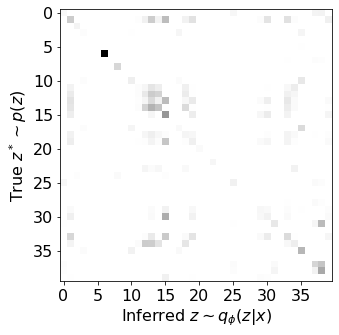

In [51]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/iw_siren_vae_dreg_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected/3/', 'ARTH_SIReN-IWAE-DReG-WU', step_size=5)

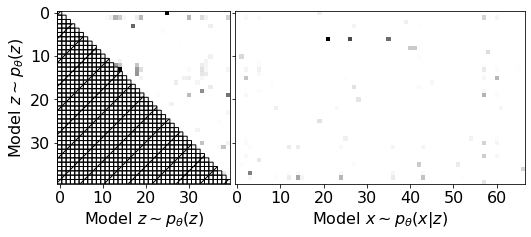

In [52]:
# MI between variables of the learned model
plot_MI_model('./experiment_logs/iw_siren_vae_dreg_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected/3/', 'ARTH_SIReN-IWAE-DReG-WU', hatch='/', step_size=10)

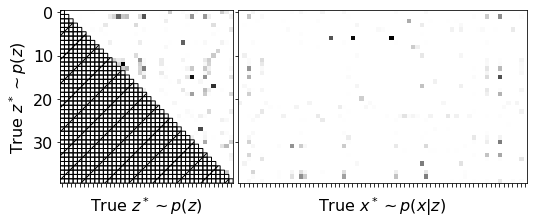

In [53]:
plot_MI_true('./experiment_logs/iw_siren_vae_dreg_wu/arth150-synth/faithful_lipmish_5_[200]_[200]_8k_75N_selected/3/', 'ARTH', hatch='/', step_size=10)

### MEHRA
#### Faithful


**SIReN-IWAE**

In [39]:
# Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32k/2/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(0)
x,_ = model.sample(5)
A = get_units_variances(model, x.double().to(device), num_latent=3)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))

A_z = ['(0): 6.19759', '(1): 2.65518', '(2): 4.61663']
#Inactive Units: 0


In [40]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='mehra-real' iw=True k=32 run=2

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:08


In [41]:
# Mutual Information estimation
! python ./siren_vae_MI.py './experiment_logs/iw_siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32k/2/' --estimate_between_true_and_inferred_latents --estimate_between_model_vars --estimate_between_true_vars

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 0.662

Per dimension:
 0: (0: 0.019) (1: 0.138) (2: 0.039) 
 1: (0: 0.008) (1: 0.339) (2: 0.165) 
 2: (0: 0.032) (1: 0.158) (2: 0.378) 
-- Between x, z ~ p(x|z)p(z) --
MI(z, z) per dimension:
 0: (1: 0.001) (2: 0.001) 
 1: (2: 0.002) 
 2: 
MI(z, x) per dimension:
 0: (0: 0.255) (1: 0.404) (2: 0.932) (3: 0.256) (4: 0.001) (5: 0.000) (6: 0.002) 
 1: (0: 0.001) (1: 0.002) (2: 0.002) (3: 0.032) (4: 0.725) (5: 0.685) (6: 0.001) 
 2: (0: 0.002) (1: 0.002) (2: 0.003) (3: 0.079) (4: 0.064) (5: 0.002) (6: 0.673) 
-- Between x, z ~ p*(x|z)p*(z) --
MI(z, z) per dimension:
 0: (1: 0.131) (2: 0.089) 
 1: (2: 0.268) 
 2: 
MI(z, x) per dimension:
 0: (0: 0.011) (1: 0.067) (2: 0.021) (3: 0.018) (4: 0.139) (5: 0.223) (6: 0.068) 
 1: (0: 0.026) (1: 0.008) (2: 0.009) (3: 0.014) (4: 0.454) (5: 0.372) (6: 0.252) 
 2: (0: 0.016) (1: 0.025) (2: 0.049) (3: 0.018) (4: 0.236) (5: 0.201) (6: 0.838) 


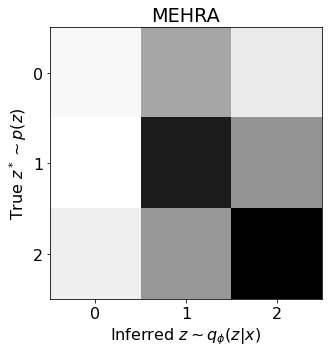

In [42]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/iw_siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32k/2/', 'MEHRA_SIReN-IWAE', title='MEHRA')

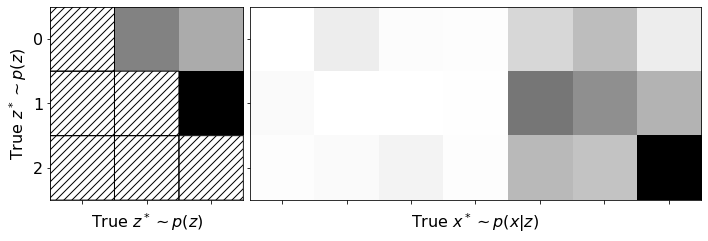

In [43]:
plot_MI_true('./experiment_logs/iw_siren_vae/mehra-real/faithful_lipmish_5_[100]_[100]_32k/2/', 'MEHRA', hatch='///', step_size=1)

**SIReN-IWAE-DReG**

In [44]:
# Check for collapsed latent variables
path = './experiment_logs/iw_siren_vae_dreg/mehra-real/faithful_lipmish_5_[100]_[100]_32k/1/'
model = load_model(path + 'model.pt', device)
torch.manual_seed(0)
x,_ = model.sample(5)
A = get_units_variances(model, x.double().to(device), num_latent=3)
print('A_z =', ['({}): {:.5f}'.format(i, v) for i,v in enumerate(A.tolist())])
print('#Inactive Units: {}'.format(np.count_nonzero(A <= 0.01)))

A_z = ['(0): 1.32568', '(1): 0.86694', '(2): 0.16700']
#Inactive Units: 0


In [45]:
# Generate samples
! python ./ex_siren_vae.py samples with bn='mehra-real' iw=True k=32 run=1 dreg=True

Device:  cuda:0
INFO - siren_vae - Running command 'samples'
INFO - siren_vae - Started
INFO - siren_vae - Completed after 0:00:09


In [46]:
# Mutual Information estimation
! python ./siren_vae_MI.py './experiment_logs/iw_siren_vae_dreg/mehra-real/faithful_lipmish_5_[100]_[100]_32k/1/' --estimate_between_true_and_inferred_latents --estimate_between_model_vars

Device: cuda
-- Between z* ~ p*(z) and z ~ q(z|x): --
MI(z*, z) = 0.745

Per dimension:
 0: (0: 0.024) (1: 0.155) (2: 0.048) 
 1: (0: 0.009) (1: 0.375) (2: 0.177) 
 2: (0: 0.030) (1: 0.150) (2: 0.437) 
-- Between x, z ~ p(x|z)p(z) --
MI(z, z) per dimension:
 0: (1: 0.001) (2: 0.000) 
 1: (2: 0.001) 
 2: 
MI(z, x) per dimension:
 0: (0: 0.234) (1: 0.378) (2: 0.952) (3: 0.273) (4: 0.001) (5: 0.001) (6: 0.000) 
 1: (0: 0.002) (1: 0.001) (2: 0.001) (3: 0.039) (4: 0.647) (5: 0.638) (6: 0.002) 
 2: (0: 0.001) (1: 0.001) (2: 0.001) (3: 0.050) (4: 0.083) (5: 0.001) (6: 0.652) 


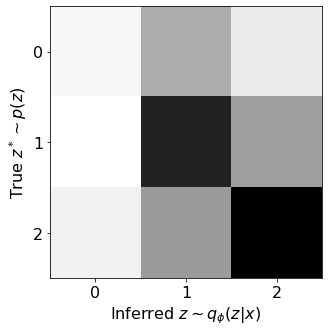

In [47]:
# MI between inferred and true latents
plot_MI_true_z_vs_inferred_z('./experiment_logs/iw_siren_vae_dreg/mehra-real/faithful_lipmish_5_[100]_[100]_32k/2/', 'MEHRA_SIReN-IWAE-DReG')

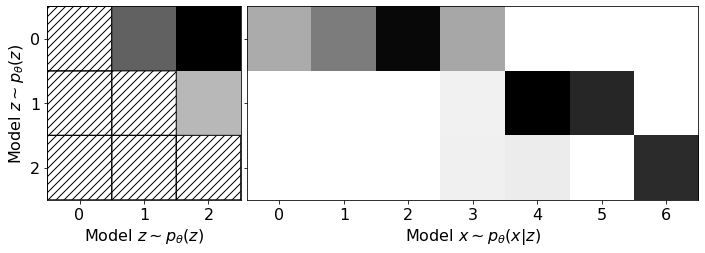

In [48]:
# MI between variables of the learned model
plot_MI_model('./experiment_logs/iw_siren_vae_dreg/mehra-real/faithful_lipmish_5_[100]_[100]_32k/2/', 'MEHRA_SIReN-IWAE-DReG', hatch='///')

## References

[1] Melis, G., György, A. and Blunsom, P. (2022). Mutual information constraints
for Monte Carlo objectives to prevent posterior collapse especially in language
modelling. Journal of Machine Learning Research, vol. 23, no. 75, pp. 1-36.

[2] Sønderby, C.K., Raiko, T., Maaløe, L., Sønderby, S.K. and Winther, O. (2016).
Ladder variational autoencoders. In: Lee, D., Sugiyama, M., von Luxburg, U.,
Guyon, I. and Garnett, R. (eds.), Advances in Neural Information Processing
Systems, vol. 29. Curran Associates, Inc.

[3] Burda, Y., Grosse, R.B. and Salakhutdinov, R. (2016). Importance weighted au-
toencoders. In: Bengio, Y. and LeCun, Y. (eds.), 4th International Conference on
Learning Representations.